In [1]:
!pip install "numpy<2.0" scikit-learn pmdarima statsmodels joblib -U

In [ ]:

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.impute import SimpleImputer

from sklearn import metrics

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif


from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import GridSearchCV
import joblib


In [ ]:
# importando datasets de treino e test

# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DDOS-SLORIS/CICIDS2017/New_CIC-2017.csv', low_memory=False)
data = pd.read_csv('path/CIC2017_1132_features_extrated.csv', low_memory=False)
data.head()


,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Idle Min_ARIMA_forecast_2,Idle Min_ARIMA_forecast_3,Idle Min_ARIMA_forecast_4,Idle Min_ARIMA_forecast_5,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,1.104441e+06,979028.757647,926504.082905,893188.591632,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,9.790288e+05,926504.082905,893188.591632,873763.115207,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,9.265041e+05,893188.591632,873763.115207,860453.163786,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,8.931886e+05,873763.115207,860453.163786,851986.646158,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,8.737631e+05,860453.163786,851986.646158,846199.079134,0.0,0.0,0.0,0.0,0.0,Benign


In [5]:
feature_selected = 100
num_holder_feat = 1

In [6]:
colunas_para_dropar = [coluna for coluna in data.columns if 'ARIMA' in coluna]

print("\nColunas encontradas para remover:")
print(colunas_para_dropar)

data = data.drop(columns=colunas_para_dropar)


Colunas encontradas para remover:
['Dst Port_ARIMA_fitted_5', 'Dst Port_ARIMA_resid_5', 'Dst Port_ARIMA_forecast_1', 'Dst Port_ARIMA_forecast_2', 'Dst Port_ARIMA_forecast_3', 'Dst Port_ARIMA_forecast_4', 'Dst Port_ARIMA_forecast_5', 'Flow Duration_ARIMA_fitted_5', 'Flow Duration_ARIMA_resid_5', 'Flow Duration_ARIMA_forecast_1', 'Flow Duration_ARIMA_forecast_2', 'Flow Duration_ARIMA_forecast_3', 'Flow Duration_ARIMA_forecast_4', 'Flow Duration_ARIMA_forecast_5', 'Tot Fwd Pkts_ARIMA_fitted_5', 'Tot Fwd Pkts_ARIMA_resid_5', 'Tot Fwd Pkts_ARIMA_forecast_1', 'Tot Fwd Pkts_ARIMA_forecast_2', 'Tot Fwd Pkts_ARIMA_forecast_3', 'Tot Fwd Pkts_ARIMA_forecast_4', 'Tot Fwd Pkts_ARIMA_forecast_5', 'Tot Bwd Pkts_ARIMA_fitted_5', 'Tot Bwd Pkts_ARIMA_resid_5', 'Tot Bwd Pkts_ARIMA_forecast_1', 'Tot Bwd Pkts_ARIMA_forecast_2', 'Tot Bwd Pkts_ARIMA_forecast_3', 'Tot Bwd Pkts_ARIMA_forecast_4', 'Tot Bwd Pkts_ARIMA_forecast_5', 'TotLen Fwd Pkts_ARIMA_fitted_5', 'TotLen Fwd Pkts_ARIMA_resid_5', 'TotLen Fwd Pk

In [7]:
data.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
label = data['Label']
len(label)

16497

In [11]:
dt = data.copy()
dt.head()

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,ECE Flag Cnt_entropy_j40,ECE Flag Cnt_j50,ECE Flag Cnt_j50_mean,ECE Flag Cnt_entropy_j50,Bwd IAT Mean_holder_j5,Bwd IAT Min_holder_j5,Fwd Seg Size Min_holder_j5,Active Mean_holder_j5,Active Min_holder_j5,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
y = dt.iloc[:, -1]
x = dt.copy().drop(['Label'], axis=1)
y = y.fillna(0)
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(0)

In [14]:
selector = SelectKBest(score_func=f_classif, k=feature_selected)  # Mantendo as 23 melhores
newfeature = selector.fit_transform(x, y)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [ 43  44  45  46  47  48 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456
 714] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
cols = selector.get_support(indices=True)
newfeature = dt.iloc[:,cols]

In [16]:
print(f'Linhas: {newfeature.shape[0]}')
print(f'Colunas: {newfeature.shape[1]}')

Linhas: 16497
Colunas: 100


In [17]:
newfeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16497 entries, 0 to 16496
Data columns (total 100 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fwd Seg Size Min            16497 non-null  int64  
 1   Active Mean                 16497 non-null  float64
 2   Active Min                  16497 non-null  int64  
 3   Dst Port_SMA_6              16497 non-null  float64
 4   Dst Port_EMA_6              16497 non-null  float64
 5   Dst Port_SMA_9              16497 non-null  float64
 6   Dst Port_EMA_9              16497 non-null  float64
 7   Dst Port_SMA_12             16497 non-null  float64
 8   Dst Port_EMA_12             16497 non-null  float64
 9   Bwd Pkt Len Max_SMA_3       16497 non-null  float64
 10  Bwd Pkt Len Max_EMA_3       16497 non-null  float64
 11  Bwd Pkt Len Max_SMA_6       16497 non-null  float64
 12  Bwd Pkt Len Max_EMA_6       16497 non-null  float64
 13  Bwd Pkt Len Max_SMA_9       16

In [18]:
rotulos = newfeature.columns
print(rotulos)

Index(['Fwd Seg Size Min', 'Active Mean', 'Active Min', 'Dst Port_SMA_6',
       'Dst Port_EMA_6', 'Dst Port_SMA_9', 'Dst Port_EMA_9', 'Dst Port_SMA_12',
       'Dst Port_EMA_12', 'Bwd Pkt Len Max_SMA_3', 'Bwd Pkt Len Max_EMA_3',
       'Bwd Pkt Len Max_SMA_6', 'Bwd Pkt Len Max_EMA_6',
       'Bwd Pkt Len Max_SMA_9', 'Bwd Pkt Len Max_EMA_9',
       'Bwd Pkt Len Max_SMA_12', 'Bwd Pkt Len Max_EMA_12',
       'Bwd Pkt Len Mean_SMA_3', 'Bwd Pkt Len Mean_EMA_3',
       'Bwd Pkt Len Mean_SMA_6', 'Bwd Pkt Len Mean_EMA_6',
       'Bwd Pkt Len Mean_SMA_9', 'Bwd Pkt Len Mean_EMA_9',
       'Bwd Pkt Len Mean_SMA_12', 'Bwd Pkt Len Mean_EMA_12',
       'Bwd Pkt Len Std_SMA_6', 'Bwd Pkt Len Std_EMA_6',
       'Bwd Pkt Len Std_SMA_9', 'Bwd Pkt Len Std_EMA_9',
       'Bwd Pkt Len Std_SMA_12', 'Bwd Pkt Len Std_EMA_12',
       'Bwd IAT Mean_EMA_9', 'Bwd IAT Mean_SMA_12', 'Bwd IAT Mean_EMA_12',
       'Bwd IAT Min_SMA_9', 'Bwd IAT Min_EMA_9', 'Bwd IAT Min_SMA_12',
       'Bwd IAT Min_EMA_12', 'Pkt Len Ma

In [19]:
dt = pd.concat([newfeature, label], axis=1)
dt.head()

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50,Fwd Seg Size Min_holder_j5,Active Min_holder_j5,Label
0,20,0.0,0,80.000000,80.000000,80.000000,80.0000,80.000000,80.000000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,32,0.0,0,234.500000,168.285714,234.500000,141.8000,234.500000,127.538462,84.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,32,0.0,0,185.666667,145.346939,185.666667,131.0400,185.666667,121.455621,581.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,32,0.0,0,236.500000,214.962099,236.500000,182.6320,236.500000,162.616295,1602.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,32,0.0,0,206.800000,178.687214,206.800000,163.7056,206.800000,151.136865,2073.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
# Supondo que df_renomeado contém seu DataFrame com as colunas já alteradas
try:
    dt.to_csv('/poseiddon/GROUP A/CONFIGURATION 3/New_feature_selected_holder_arima_features.csv', index=False)
    print("\nDataset salvo com sucesso como 'holder_features.csv'")
except Exception as e:
    print(f"\nOcorreu um erro ao salvar o CSV: {e}")


Dataset salvo com sucesso como 'holder_features.csv'


In [ ]:
feat = pd.read_csv('/poseiddon/GROUP A/CONFIGURATION 3/New_feature_selected_holder_arima_features.csv')

In [23]:
# Obter rótulos das classes

names = ['Tráfego_normal', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest']
# Map string labels to numerical values before getting unique values
label_map = {'Benign': 0, 'DoS attacks-Slowloris': 1, 'DoS attacks-SlowHTTPTest': 2}
dt['Label'] = dt['Label'].map(label_map)

classes = [names[i] for i in dt['Label'].unique()]
index = np.arange(len(classes))
classes

['Tráfego_normal', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest']

In [24]:
# Criando rotulos para dados benignos e dados maliciosos Slowloris

# Unificando nomenclatura para normal em todos os tipos de trafego normal
dt['Label'] = dt['Label'].replace(['Benign'], 0)
dt['Label'] = dt['Label'].replace(['DoS attacks-Slowloris'], 1)
dt['Label'] = dt['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)
dt['Label'].value_counts()

,count
Label,
0,5499
1,5499
2,5499


In [25]:
# Atribuindo o label ao eixo y e as outras features do dataframe x_data, sem o label.

y = dt['Label']
x_data = dt.drop(['Label'],axis=1)
x_data.head()

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j30,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50,Fwd Seg Size Min_holder_j5,Active Min_holder_j5
0,20,0.0,0,80.000000,80.000000,80.000000,80.0000,80.000000,80.000000,6.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32,0.0,0,234.500000,168.285714,234.500000,141.8000,234.500000,127.538462,84.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32,0.0,0,185.666667,145.346939,185.666667,131.0400,185.666667,121.455621,581.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32,0.0,0,236.500000,214.962099,236.500000,182.6320,236.500000,162.616295,1602.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0.0,0,206.800000,178.687214,206.800000,163.7056,206.800000,151.136865,2073.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
inputs = len(dt.columns)
print('Número de entradas: ', inputs)

Número de entradas:  101


In [ ]:
x = x_data
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(0)

In [30]:
y = label
x = newfeature

In [ ]:

x = x.replace([np.inf, -np.inf], np.nan)
y = y.fillna(0)
x = x.fillna(0)

In [ ]:
corr = x.corr()
corr

,Fwd Seg Size Min,Active Mean,Active Min,Dst Port_SMA_6,Dst Port_EMA_6,Dst Port_SMA_9,Dst Port_EMA_9,Dst Port_SMA_12,Dst Port_EMA_12,Bwd Pkt Len Max_SMA_3,...,PSH Flag Cnt_entropy_j30,PSH Flag Cnt_entropy_j40,PSH Flag Cnt_entropy_j50,ACK Flag Cnt_entropy_j10,ACK Flag Cnt_entropy_j20,ACK Flag Cnt_entropy_j30,ACK Flag Cnt_entropy_j40,ACK Flag Cnt_entropy_j50,Fwd Seg Size Min_holder_j5,Active Min_holder_j5
Fwd Seg Size Min,1.000000,0.513041,0.521658,-0.407817,-0.418980,-0.454441,-0.463700,-0.492005,-0.495643,-0.471346,...,-0.637454,-0.627560,-0.622045,-0.612067,-0.629381,-0.613895,-0.601825,-0.594266,0.841308,-0.079150
Active Mean,0.513041,1.000000,0.887552,-0.222817,-0.232375,-0.244811,-0.253310,-0.261486,-0.268212,-0.264132,...,-0.507088,-0.530581,-0.549169,-0.418085,-0.475239,-0.502258,-0.525201,-0.543129,0.535119,0.139604
Active Min,0.521658,0.887552,1.000000,-0.170156,-0.176225,-0.186524,-0.192399,-0.198897,-0.203788,-0.200434,...,-0.478339,-0.515283,-0.544514,-0.359516,-0.430520,-0.477937,-0.515122,-0.544271,0.453185,0.299146
Dst Port_SMA_6,-0.407817,-0.222817,-0.170156,1.000000,0.948176,0.917243,0.958876,0.840907,0.942953,0.131934,...,0.348876,0.337711,0.327768,0.419141,0.400128,0.371871,0.350349,0.333947,-0.418250,0.154759
Dst Port_EMA_6,-0.418980,-0.232375,-0.176225,0.948176,1.000000,0.892111,0.985411,0.836480,0.959503,0.123694,...,0.359204,0.347804,0.337642,0.424572,0.408029,0.380435,0.359097,0.342718,-0.431667,0.147229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACK Flag Cnt_entropy_j30,-0.613895,-0.502258,-0.477937,0.371871,0.380435,0.415772,0.421994,0.448491,0.451401,0.321250,...,0.973945,0.930172,0.876467,0.736237,0.916037,1.000000,0.947711,0.888151,-0.616854,0.016946
ACK Flag Cnt_entropy_j40,-0.601825,-0.525201,-0.515122,0.350349,0.359097,0.391100,0.397971,0.421899,0.425731,0.308393,...,0.926252,0.978479,0.949444,0.677915,0.835214,0.947711,1.000000,0.965651,-0.602365,-0.041860
ACK Flag Cnt_entropy_j50,-0.594266,-0.543129,-0.544271,0.333947,0.342718,0.372332,0.379503,0.401602,0.405875,0.296855,...,0.870447,0.946841,0.981151,0.643043,0.782945,0.888151,0.965651,1.000000,-0.592755,-0.087382
Fwd Seg Size Min_holder_j5,0.841308,0.535119,0.453185,-0.418250,-0.431667,-0.463625,-0.476316,-0.500539,-0.508702,-0.479520,...,-0.641322,-0.629133,-0.621660,-0.619468,-0.634285,-0.616854,-0.602365,-0.592755,1.000000,-0.080880


In [ ]:
corr = x.corr()
colormap = sns.diverging_palette(10, 150, as_cmap = True)
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            cmap = colormap, linewidths=0.5, linecolor='white')
plt.title('Corelação de Recursos', y=1.05, size=16)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dt['Label'] = dt['Label'].replace(['Benign'], 0)
dt['Label'] = dt['Label'].replace(['DoS attacks-Slowloris'], 1)
dt['Label'] = dt['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)
dt['Label'].value_counts()

,count
Label,
0,5499
1,5499
2,5499


In [ ]:
y = dt['Label']
y.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [ ]:
x = x.replace([np.inf, -np.inf], np.nan)
y = y.fillna(0)
x = x.fillna(0)

In [39]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [40]:
# Seperação dos dados em teino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

print(f'Treinamento: {x_train.shape[0]}  ---  {(x_train.shape[0]/x.shape[0])*100:.2f}%')
print(f'Teste: {x_test.shape[0]}  ---  {(x_test.shape[0]/x.shape[0])*100:.2f}%')

Treinamento: 13197  ---  80.00%
Teste: 3300  ---  20.00%


In [41]:
# Importamos as bibliotecas necessárias
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import keras
import tensorflow as tf
from keras.metrics import Precision, Recall, F1Score, SparseCategoricalAccuracy # [1]

In [42]:
num_classes = len(np.unique(y_train))
print(num_classes)

3


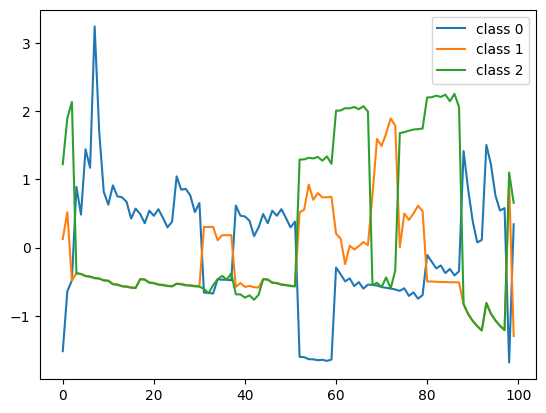

In [43]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [ ]:
metricas_scoring = {
    "Accuracy": "accuracy",
    "Precision": "precision_weighted",
    "Recall": "recall_weighted",
    "F1-Score": "f1_weighted"
}

all_scores_cv = {nome_metrica: {} for nome_metrica in metricas_scoring.keys()}

In [45]:
y_train_lstm = y_train.copy()
y_test_lstm = y_test.copy()
x_train_lstm = x_train.copy()
x_test_lstm = x_test.copy()

In [46]:
x_train_lstm = x_train_lstm.reshape((x_train_lstm.shape[0], x_train_lstm.shape[1], 1))
x_test_lstm = x_test_lstm.reshape((x_test_lstm.shape[0], x_test_lstm.shape[1], 1))

In [47]:
num_classes = len(np.unique(y_train))
print(num_classes)

3


In [48]:
def make_model(input_shape, dropout_rate=0.5):
  input_layer = keras.layers.Input(input_shape)

  conv1 = keras.layers.Conv1D(filters=256, kernel_size=3, padding="same")(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)

  conv1 = keras.layers.Dropout(rate=dropout_rate)(conv1)

  conv2 = keras.layers.Conv1D(filters=256, kernel_size=3, padding="same")(conv1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv2)

  conv2 = keras.layers.Dropout(rate=dropout_rate)(conv2)

  conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  gap = keras.layers.Dropout(rate=dropout_rate)(gap)

  output_layer = keras.layers.Dense(num_classes, activation="sigmoid")(gap)

  return keras.models.Model(inputs=input_layer, outputs=output_layer)


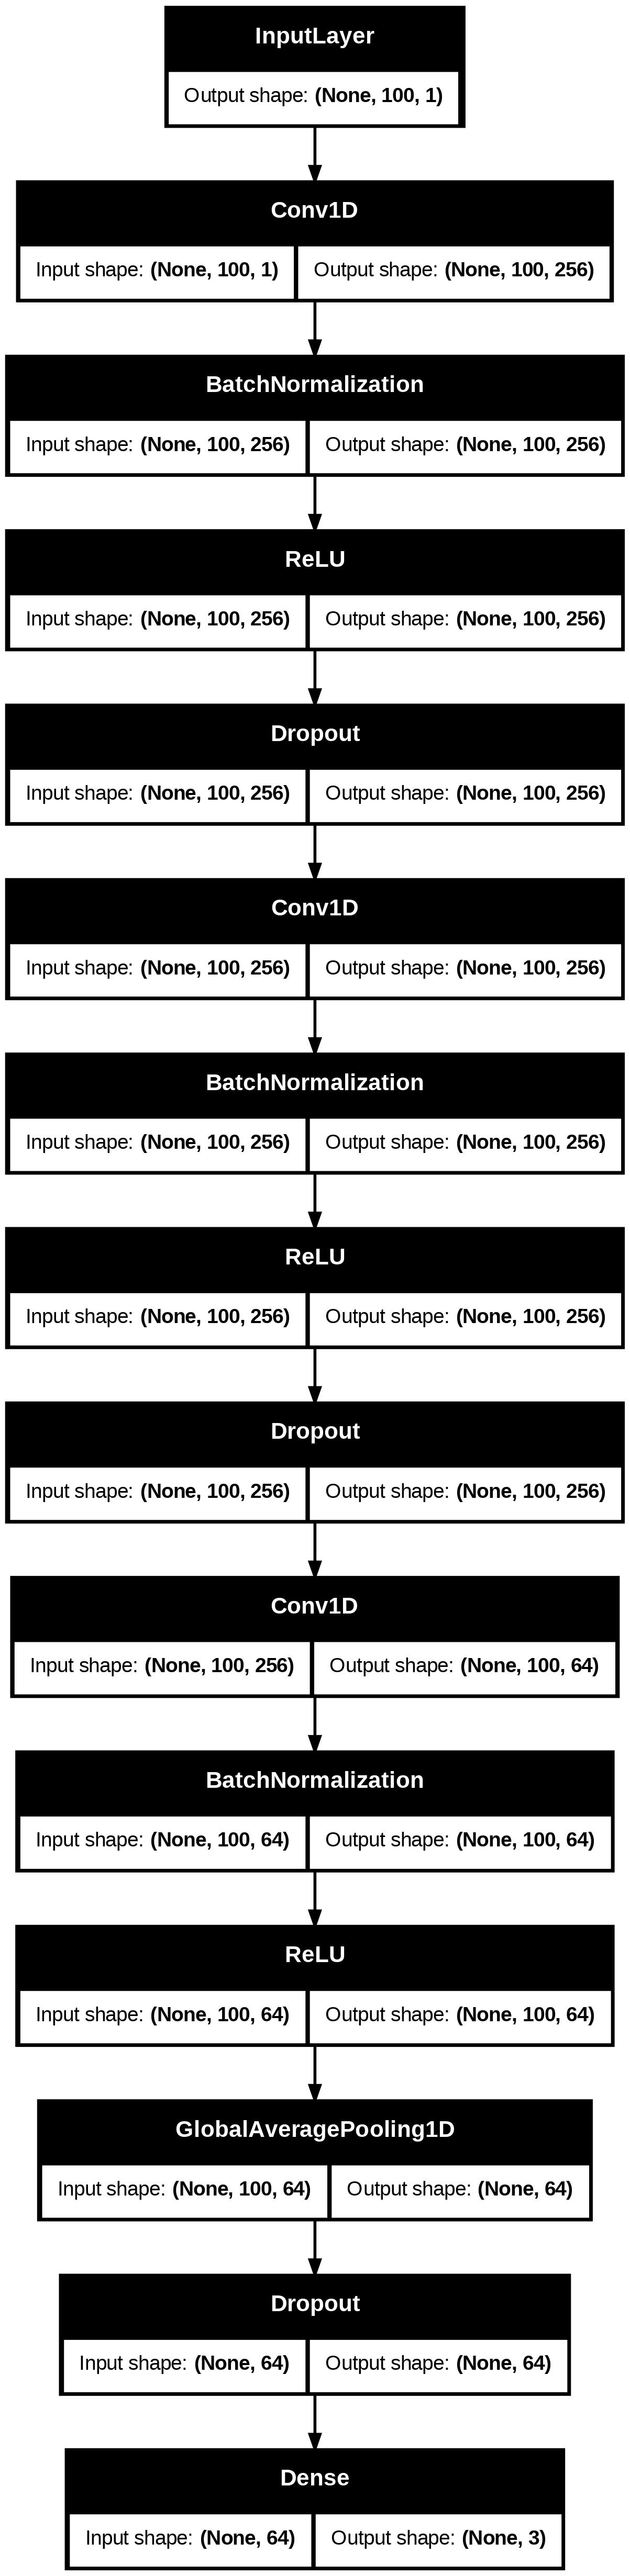

In [ ]:
model = make_model(input_shape=x_train_lstm.shape[1:])

keras.utils.plot_model(model, show_shapes=True)

In [50]:
n_folds = 10
epochs = 50
batch_size = 32

In [ ]:
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

acc_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []
loss_per_fold = []

In [52]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=30, min_lr=0.0005
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", mode='min', patience=30, restore_best_weights=True, verbose=1),
]

In [ ]:
if len(y_train_lstm.shape) == 1:
    y_train_lstm = np.expand_dims(y_train_lstm, axis=-1)

if len(y_test_lstm.shape) == 1:
    y_test_lstm = np.expand_dims(y_test_lstm, axis=-1)

print(f"Novo shape de y_train: {y_train_lstm.shape}")


Novo shape de y_train: (13197, 1)


In [54]:
from tqdm import tqdm

In [ ]:
fold_no = 1
for train_index, val_index in tqdm(kf.split(x_train_lstm, y_train_lstm)):
    print(f'----------------- Fold {fold_no}/{n_folds} -----------------')

    X_train_fold, X_val_fold = x_train_lstm[train_index], y_train_lstm[val_index]
    Y_train_fold, Y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

    model = make_model(input_shape=x_train_lstm.shape[1:])

    model.compile(
      optimizer='adam',
      loss="sparse_categorical_crossentropy",
      metrics=[
          SparseCategoricalAccuracy(name='accuracy'),
      ],
    )

    print('Treinando...')
    history = model.fit(
      x_train_lstm,
      y_train_lstm,
      batch_size=batch_size,
      epochs=epochs,
      callbacks=callbacks,
      validation_split=0.2,
      verbose=1,
    )

    print('Avaliando performance...')
    loss, accuracy_val = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    y_pred_probs = model.predict(X_val_fold)
    y_pred_labels = np.argmax(y_pred_probs, axis=1)
    y_true_labels = np.squeeze(Y_val_fold)

    print(f'Loss: {loss:.4f}, Accuracy: {accuracy_val:.4f}')

    fold_no += 1


0it [00:00, ?it/s]

----------------- Fold 1/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.7079 - loss: 0.6806 - val_accuracy: 0.6538 - val_loss: 0.8758 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.8832 - loss: 0.3314 - val_accuracy: 0.8780 - val_loss: 0.2544 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.8976 - loss: 0.2765 - val_accuracy: 0.9193 - val_loss: 0.2238 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9138 - loss: 0.2267 - val_accuracy: 0.9527 - val_loss: 0.1402 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9192 - loss: 0.2166 - val_accuracy: 0.9409 - val_loss: 0.1975 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9270 - loss: 0.1979 - val_accuracy: 0.9534 - val_loss: 0.1266 - learning_rate: 0.0010
Epoch 7/50
330/33

1it [10:56, 656.58s/it]

Loss: 23.3953, Accuracy: 0.3523
----------------- Fold 2/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.6973 - loss: 0.6929 - val_accuracy: 0.5409 - val_loss: 0.8808 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8757 - loss: 0.3353 - val_accuracy: 0.9451 - val_loss: 0.2215 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8971 - loss: 0.2688 - val_accuracy: 0.9277 - val_loss: 0.2057 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9140 - loss: 0.2278 - val_accuracy: 0.9508 - val_loss: 0.1379 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9268 - loss: 0.2042 - val_accuracy: 0.9314 - val_loss: 0.1756 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9280 - loss: 0.1947 - val_accuracy: 0.9580 - val_loss: 0.1257 - learnin

2it [22:23, 674.51s/it]

Loss: 17.2154, Accuracy: 0.3273
----------------- Fold 3/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.6961 - loss: 0.6857 - val_accuracy: 0.3587 - val_loss: 0.9974 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8701 - loss: 0.3477 - val_accuracy: 0.8909 - val_loss: 0.2509 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.9092 - loss: 0.2621 - val_accuracy: 0.9504 - val_loss: 0.1577 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.9149 - loss: 0.2231 - val_accuracy: 0.6856 - val_loss: 0.6659 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9183 - loss: 0.2191 - val_accuracy: 0.9496 - val_loss: 0.1405 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.9295 - loss: 0.1911 - val_accuracy: 0.9549 - val_loss: 0.1309 - learnin

3it [33:40, 675.64s/it]

Loss: 26.8230, Accuracy: 0.3341
----------------- Fold 4/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.6717 - loss: 0.7362 - val_accuracy: 0.5292 - val_loss: 0.9146 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8740 - loss: 0.3514 - val_accuracy: 0.9326 - val_loss: 0.2138 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9058 - loss: 0.2647 - val_accuracy: 0.9508 - val_loss: 0.1505 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9191 - loss: 0.2295 - val_accuracy: 0.9239 - val_loss: 0.1755 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9255 - loss: 0.2062 - val_accuracy: 0.9519 - val_loss: 0.1364 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9335 - loss: 0.1797 - val_accuracy: 0.9489 - val_loss: 0.1710 - learnin

4it [44:12, 658.24s/it]

Loss: 30.9387, Accuracy: 0.3167
----------------- Fold 5/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.7112 - loss: 0.6640 - val_accuracy: 0.5875 - val_loss: 0.8829 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8708 - loss: 0.3409 - val_accuracy: 0.8826 - val_loss: 0.2450 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8986 - loss: 0.2701 - val_accuracy: 0.9420 - val_loss: 0.1840 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9186 - loss: 0.2265 - val_accuracy: 0.9542 - val_loss: 0.1400 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9218 - loss: 0.2067 - val_accuracy: 0.9561 - val_loss: 0.1295 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9257 - loss: 0.1934 - val_accuracy: 0.9519 - val_loss: 0.1211 - learnin

5it [54:55, 652.80s/it]

Loss: 35.6794, Accuracy: 0.6856
----------------- Fold 6/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.6972 - loss: 0.7022 - val_accuracy: 0.5549 - val_loss: 0.8883 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.8729 - loss: 0.3395 - val_accuracy: 0.9455 - val_loss: 0.2146 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9031 - loss: 0.2644 - val_accuracy: 0.9519 - val_loss: 0.1542 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9150 - loss: 0.2244 - val_accuracy: 0.8977 - val_loss: 0.3209 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9198 - loss: 0.2131 - val_accuracy: 0.6515 - val_loss: 0.7380 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9328 - loss: 0.1836 - val_accuracy: 0.9462 - val_loss: 0.1322 - learnin

6it [1:06:38, 669.77s/it]

Loss: 25.7951, Accuracy: 0.3250
----------------- Fold 7/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.7093 - loss: 0.6665 - val_accuracy: 0.6261 - val_loss: 0.8766 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.8683 - loss: 0.3483 - val_accuracy: 0.8981 - val_loss: 0.2602 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.9041 - loss: 0.2578 - val_accuracy: 0.9485 - val_loss: 0.1738 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9208 - loss: 0.2229 - val_accuracy: 0.9542 - val_loss: 0.1384 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 42ms/step - accuracy: 0.9237 - loss: 0.2056 - val_accuracy: 0.9557 - val_loss: 0.1177 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.9306 - loss: 0.1866 - val_accuracy: 0.9515 - val_loss: 0.1472 - learnin

7it [1:19:00, 693.64s/it]

Loss: 28.4018, Accuracy: 0.3136
----------------- Fold 8/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.7183 - loss: 0.6661 - val_accuracy: 0.6591 - val_loss: 0.8207 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8768 - loss: 0.3409 - val_accuracy: 0.9258 - val_loss: 0.2194 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9060 - loss: 0.2546 - val_accuracy: 0.9477 - val_loss: 0.1620 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9173 - loss: 0.2295 - val_accuracy: 0.9496 - val_loss: 0.1554 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9231 - loss: 0.2052 - val_accuracy: 0.9568 - val_loss: 0.1311 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.9307 - loss: 0.1984 - val_accuracy: 0.9322 - val_loss: 0.1562 - learnin

8it [1:30:15, 687.44s/it]

Loss: 26.2858, Accuracy: 0.6566
----------------- Fold 9/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.7236 - loss: 0.6585 - val_accuracy: 0.6106 - val_loss: 0.8524 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.8699 - loss: 0.3507 - val_accuracy: 0.8765 - val_loss: 0.2386 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9062 - loss: 0.2648 - val_accuracy: 0.9534 - val_loss: 0.1607 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9148 - loss: 0.2310 - val_accuracy: 0.9542 - val_loss: 0.1336 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9245 - loss: 0.2016 - val_accuracy: 0.9504 - val_loss: 0.1487 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9257 - loss: 0.1881 - val_accuracy: 0.9583 - val_loss: 0.1170 - learnin

9it [1:40:45, 669.69s/it]

Loss: 25.7235, Accuracy: 0.6854
----------------- Fold 10/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.7224 - loss: 0.6550 - val_accuracy: 0.6394 - val_loss: 0.8778 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8798 - loss: 0.3470 - val_accuracy: 0.9197 - val_loss: 0.2262 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9010 - loss: 0.2691 - val_accuracy: 0.9280 - val_loss: 0.2089 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9172 - loss: 0.2234 - val_accuracy: 0.9511 - val_loss: 0.1364 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9222 - loss: 0.2132 - val_accuracy: 0.9443 - val_loss: 0.1347 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.9300 - loss: 0.1924 - val_accuracy: 0.9572 - val_loss: 0.1209 - learni

10it [1:51:59, 671.97s/it]

Loss: 19.9023, Accuracy: 0.3222


In [56]:
modelLSTM = keras.models.load_model("best_model.keras")

test_loss, test_acc = model.evaluate(x_test_lstm, y_test_lstm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9908 - loss: 0.0509
Test accuracy 0.989393949508667
Test loss 0.051882047206163406


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probs = modelLSTM.predict(x_test_lstm)

y_pred_labels = np.argmax(y_pred_probs, axis=1)

y_true_labels = np.squeeze(y_test_lstm)

report = classification_report(
    y_true_labels,
    y_pred_labels,
    target_names=['Benign (0)', 'DoS-Slowloris (1)', 'DoS-SlowHTTPTest (2)'],
    digits=4,
    zero_division=0 
)

print("\n--- Relatório de Classificação Completo ---")
print(report)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

--- Relatório de Classificação Completo ---
                      precision    recall  f1-score   support

          Benign (0)     0.9925    0.9925    0.9925      1068
   DoS-Slowloris (1)     0.9811    0.9698    0.9754      1126
DoS-SlowHTTPTest (2)     0.9723    0.9837    0.9780      1106

            accuracy                         0.9818      3300
           macro avg     0.9820    0.9820    0.9820      3300
        weighted avg     0.9819    0.9818    0.9818      3300



Scores de CV do LSTM coletados e salvos em 'all_scores_cv_teste'.


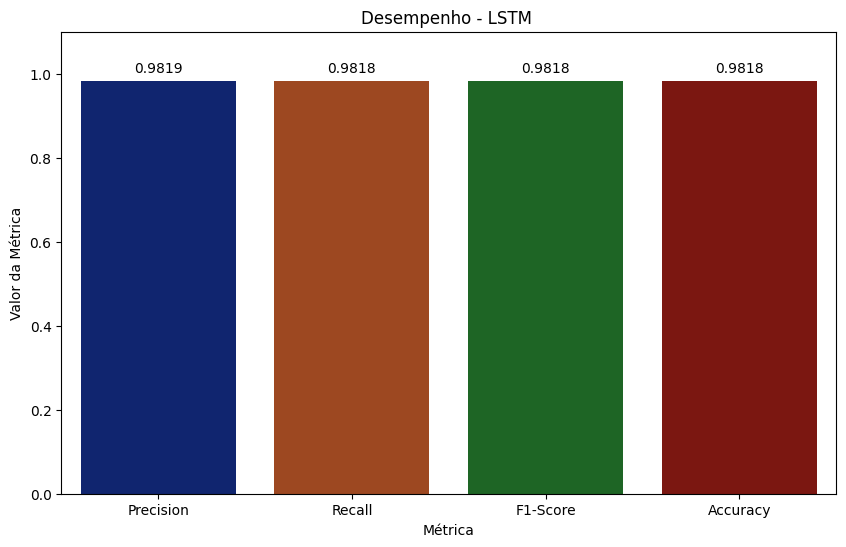

In [ ]:
precision = precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
recall = recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_labels, y_pred_labels)

lstm_scores_temp = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
for nome_metrica in metricas_scoring.keys():
    scores_lstm = np.array(lstm_scores_temp[nome_metrica])

    all_scores_cv[nome_metrica]['LSTM'] = scores_lstm

print(f"Scores de CV do {'LSTM'} coletados e salvos em 'all_scores_cv_teste'.")

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}
df_metricas = pd.DataFrame(metricas)
df_metrics_lstm = df_metricas.copy()
df_metrics_lstm = df_metrics_lstm.insert(loc=0, column='Modelo', value='LSTM')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

plt.title('Desempenho - LSTM ')
plt.ylim(0, 1.1)
plt.ylabel('Valor da Métrica')
plt.show()

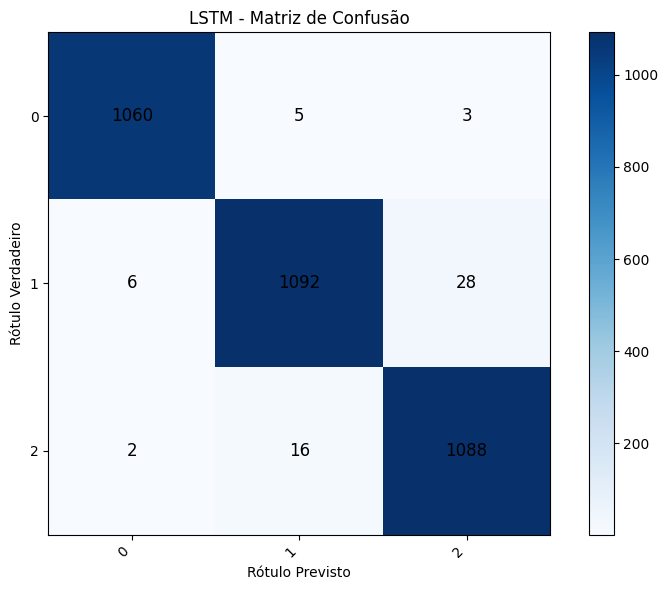

In [ ]:
from sklearn.metrics import confusion_matrix


y_pred_labels = np.argmax(y_pred_probs, axis=1)

y_true_labels = np.squeeze(y_test_lstm)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]),
                 ha='center', va='center',
                 color='black', fontsize=12) 
plt.title('LSTM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(classes)), labels=classes)

plt.tight_layout() 
plt.show()

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


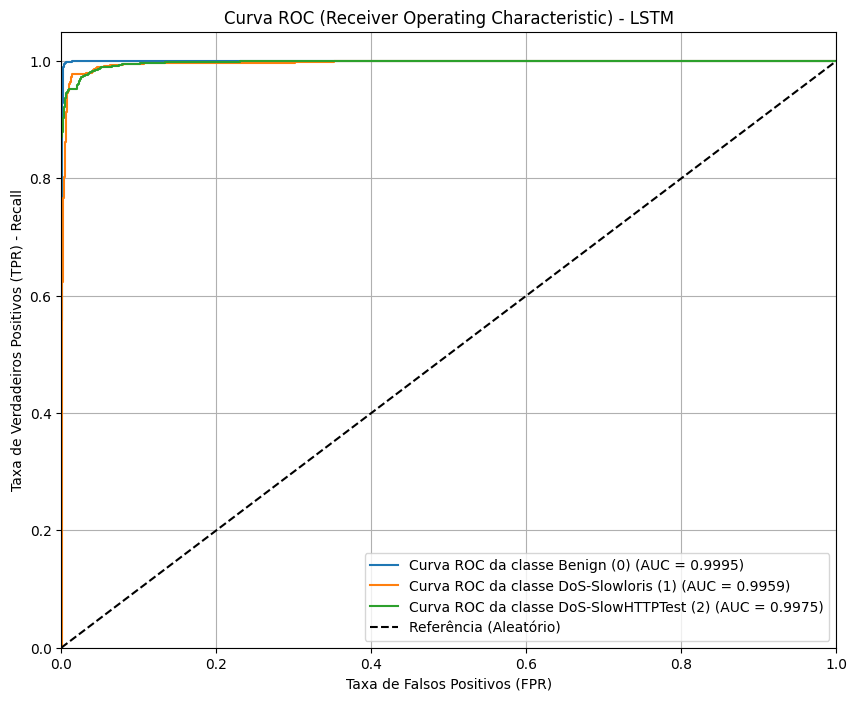

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

class_names = [0, 1, 2]
n_classes = len(class_names)

legend_names = ['Benign (0)', 'DoS-Slowloris (1)', 'DoS-SlowHTTPTest (2)']

y_pred_prob = model.predict(x_test_lstm) 

y_true_labels = np.squeeze(y_test_lstm)
y_test_bin = label_binarize(y_true_labels, classes=class_names)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {legend_names[i]} (AUC = {roc_auc[i]:.4f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR) - Recall')
plt.title('Curva ROC (Receiver Operating Characteristic) - LSTM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# MLP modelagem
modelMLP = MLPClassifier(hidden_layer_sizes=(256,),
                        max_iter = 1000,activation = 'tanh',
                        solver = 'adam',
                        learning_rate_init = 0.05, early_stopping = True,
                        verbose=True)


In [62]:
modelMLP.fit(x_train, y_train)

Iteration 1, loss = 0.27047873
Validation score: 0.971970
Iteration 2, loss = 0.06027302
Validation score: 0.986364
Iteration 3, loss = 0.05123340
Validation score: 0.961364
Iteration 4, loss = 0.04179329
Validation score: 0.975758
Iteration 5, loss = 0.03560454
Validation score: 0.995455
Iteration 6, loss = 0.02619449
Validation score: 0.993182
Iteration 7, loss = 0.03159205
Validation score: 0.994697
Iteration 8, loss = 0.04078779
Validation score: 0.993939
Iteration 9, loss = 0.04229737
Validation score: 0.968939
Iteration 10, loss = 0.03201701
Validation score: 0.975758
Iteration 11, loss = 0.02957102
Validation score: 0.995455
Iteration 12, loss = 0.02651539
Validation score: 0.971970
Iteration 13, loss = 0.04254379
Validation score: 0.987121
Iteration 14, loss = 0.04492644
Validation score: 0.993182
Iteration 15, loss = 0.03001120
Validation score: 0.993939
Iteration 16, loss = 0.03092509
Validation score: 0.993939
Validation score did not improve more than tol=0.000100 for 10 co

,hidden_layer_sizes,"(256,)"
,activation,'tanh'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.05
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,None


In [63]:
previsoes_algoritmos = {}

In [64]:
previsoes_algoritmos['LSTM'] = y_pred_labels

In [65]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [66]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:

nome_modelo = "MLP"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():

    scores = cross_val_score(modelMLP, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=1, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    8.7s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    9.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.3s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.2s remaining:    3.4s


Scores de CV do MLP coletados e salvos em 'all_scores_cv_teste'.


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.6s finished


In [ ]:
# Realizando predições
predictsMLP = modelMLP.predict(x_test)
accuracyMLP = accuracy_score(y_test, predictsMLP)
print(f'Precisão do modelo de MLP: {accuracyMLP}')
reportMLP = classification_report(y_test, predictsMLP, digits=4)
print(f'\nRelatório de Classificação:\n{reportMLP}')

Precisão do modelo de MLP: 0.9924242424242424

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9925    0.9972    0.9949      1068
           1     0.9885    0.9929    0.9907      1126
           2     0.9964    0.9873    0.9918      1106

    accuracy                         0.9924      3300
   macro avg     0.9925    0.9925    0.9925      3300
weighted avg     0.9924    0.9924    0.9924      3300



In [69]:
print(f'Scores validação cruzada MLP: {scores}')
print(f'Média dos scores: {scores.mean()}')
print(f'Desvio padrão dos scores: {scores.std()}')

Scores validação cruzada MLP: [0.99757521 0.99454141 0.99090572 0.99150926 0.99454214 0.990903
 0.99393603 0.9921175  0.99575718 0.99393842]
Média dos scores: 0.9935725876712974
Desvio padrão dos scores: 0.002086898453372766


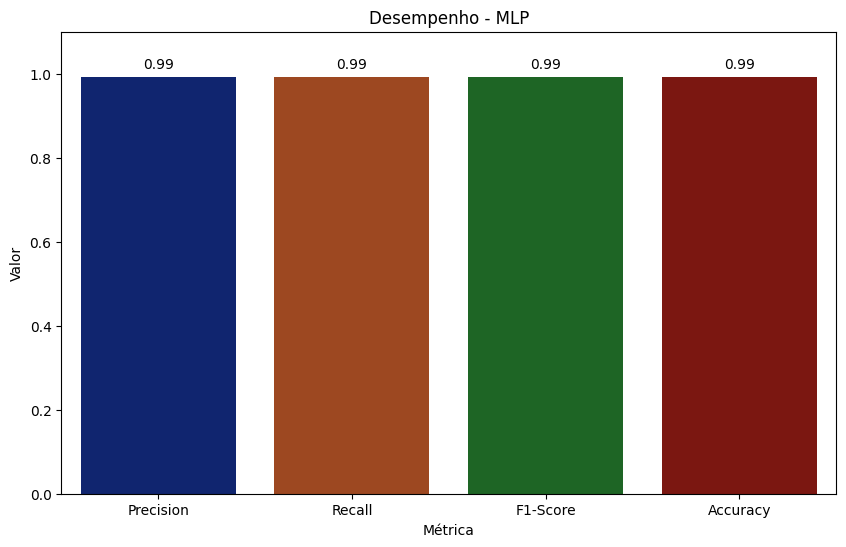

In [ ]:
y_pred = predictsMLP
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_mlp = df_metricas.copy()
df_metrics_mlp.insert(loc=0, column='Modelo', value='MLP')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - MLP')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [71]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt # Importe para customizar o gráfico
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

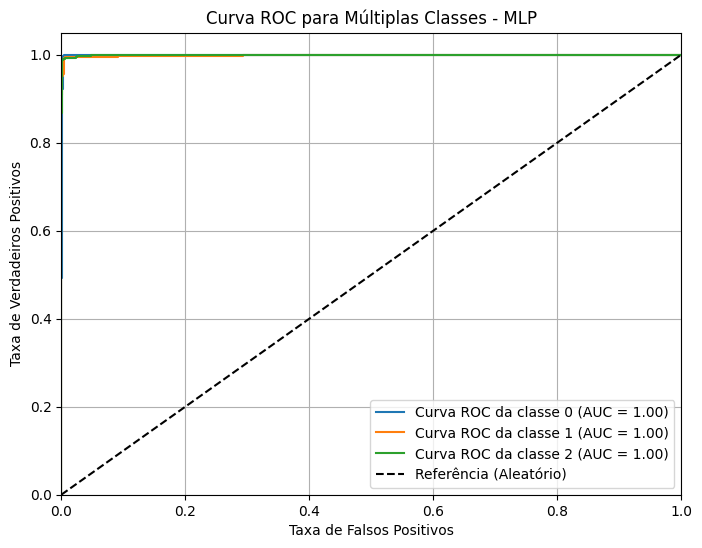

In [ ]:
class_names = modelMLP.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - MLP')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [73]:
previsoes_algoritmos['MLP'] = y_pred

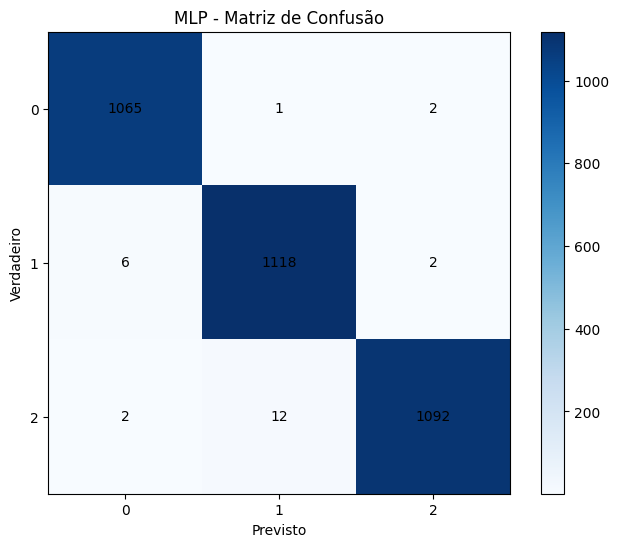

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('MLP - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train, y_train)

nome_modelo = "Naive Bayes"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():

    scores = cross_val_score(nb, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")
scores_nb = scores



Scores de CV do Naive Bayes coletados e salvos em 'all_scores_cv_teste'.


In [76]:
print(f'Scores validação cruzada MLP: {scores_nb}')
print(f'Média dos scores: {scores_nb.mean()}')
print(f'Desvio padrão dos scores: {scores_nb.std()}')

Scores validação cruzada MLP: [0.9114226  0.91879263 0.90819456 0.9086192  0.9186259  0.89277053
 0.89874517 0.89468232 0.89159772 0.90346256]
Média dos scores: 0.9046913181506022
Desvio padrão dos scores: 0.009574051632607898


In [ ]:
predictsNB = nb.predict(x_test)

accuracyNB = accuracy_score(y_test, predictsNB)
print(f'Precisão do modelo de NB: {accuracyNB}')

reportNB = classification_report(y_test, predictsNB, digits=4)
print(f'\nRelatório de Classificação:\n{reportNB}')

Precisão do modelo de NB: 0.906060606060606

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9442    0.9981    0.9704      1068
           1     0.8255    0.9831    0.8974      1126
           2     0.9843    0.7387    0.8440      1106

    accuracy                         0.9061      3300
   macro avg     0.9180    0.9067    0.9040      3300
weighted avg     0.9172    0.9061    0.9032      3300



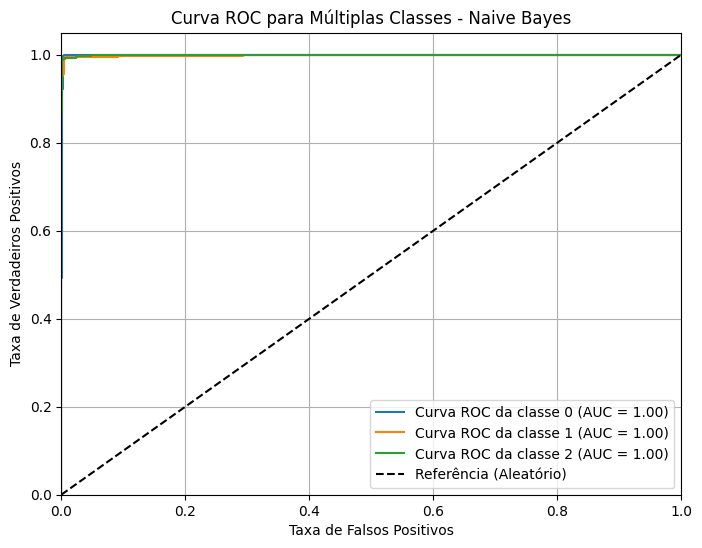

In [ ]:
class_names = nb.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Naive Bayes')
plt.legend(loc="lower right")
plt.grid()
plt.show()

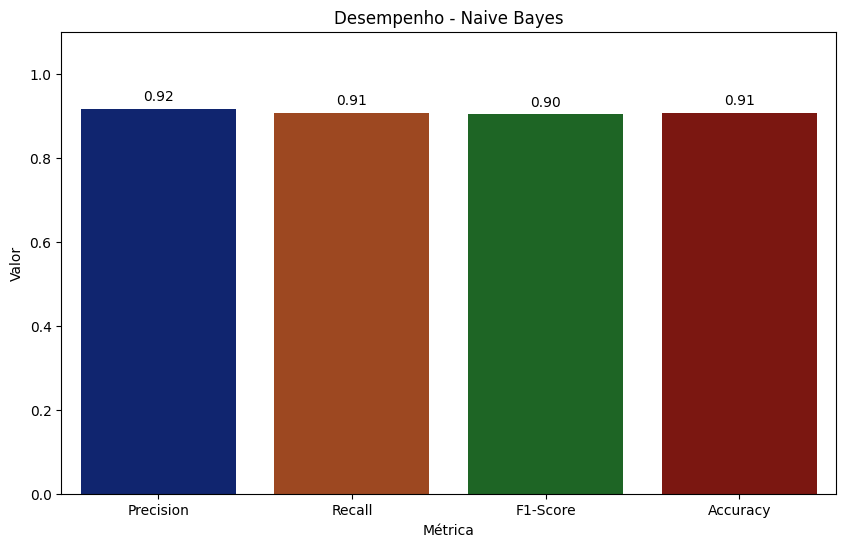

In [ ]:
# Calcular as métricas
y_pred = predictsNB
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_nb = df_metricas.copy()
df_metrics_nb.insert(loc=0, column='Modelo', value='Naive Bayes')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Naive Bayes')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

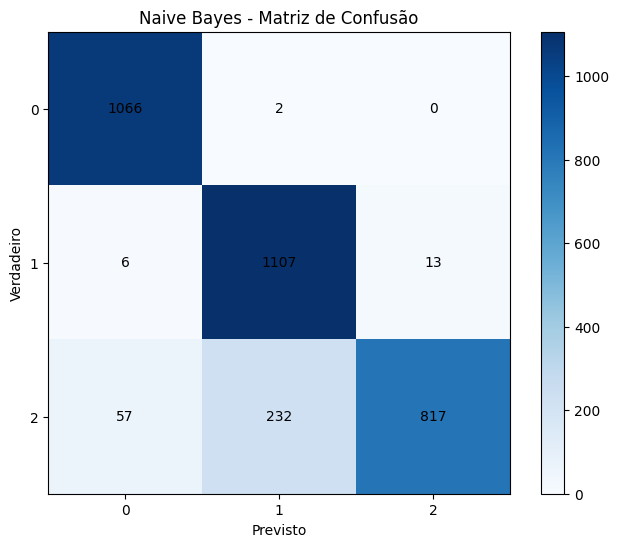

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Naive Bayes - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [81]:
previsoes_algoritmos['Naive Bayes'] = y_pred

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(
  criterion='entropy',
  max_depth=10,
  min_samples_split=2,
  min_samples_leaf=1,
  max_features=None
)

modelDT.fit(x_train, y_train)

nome_modelo = "Decision Tree"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():

    scores = cross_val_score(modelDT, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores

scores_DT = scores
print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")

print(f'Scores validação cruzada MLP: {scores_DT}')
print(f'Média dos scores: {scores_DT.mean()}')
print(f'Desvio padrão dos scores: {scores_DT.std()}')


Scores de CV do Decision Tree coletados e salvos em 'all_scores_cv_teste'.
Scores validação cruzada MLP: [0.99818182 0.9981818  0.99878788 0.99878787 0.99939394 0.99939394
 0.99757575 1.         0.99818071 0.9981796 ]
Média dos scores: 0.9986663313761843
Desvio padrão dos scores: 0.0007070128018117207


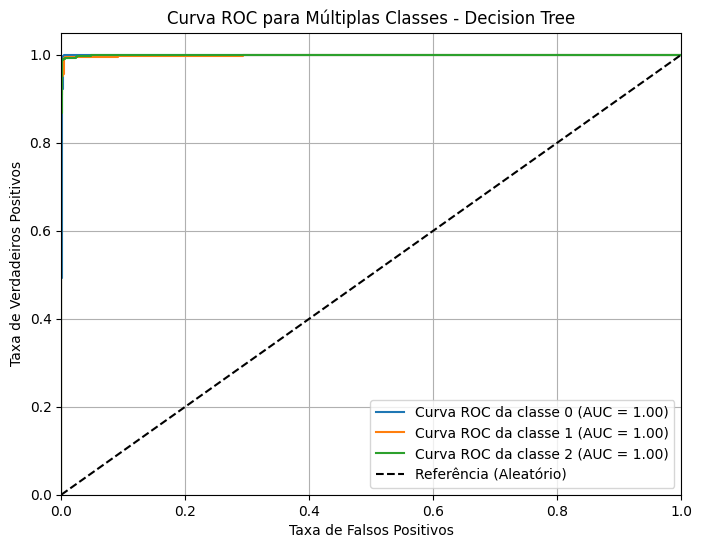

In [ ]:
class_names = modelDT.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
#  predições
predictsDT = modelDT.predict(x_test)

accuracyDT = accuracy_score(y_test, predictsDT)
print(f'Precisão do modelo de Árvore de Decisão: {accuracyDT}')

reportDT = classification_report(y_test, predictsDT, digits=4)
print(f'\nRelatório de Classificação:\n{reportDT}')

Precisão do modelo de Árvore de Decisão: 0.9978787878787879

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9981    0.9981    0.9981      1068
           1     0.9965    0.9982    0.9973      1126
           2     0.9991    0.9973    0.9982      1106

    accuracy                         0.9979      3300
   macro avg     0.9979    0.9979    0.9979      3300
weighted avg     0.9979    0.9979    0.9979      3300



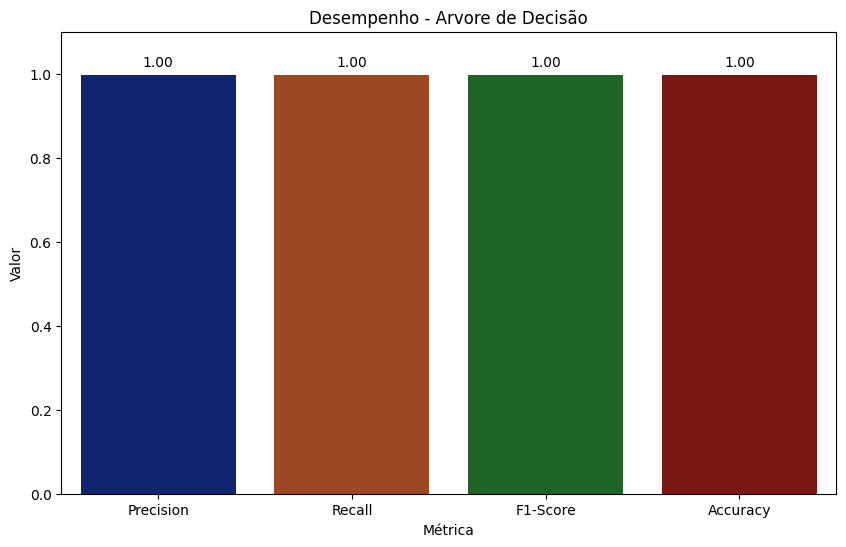

In [ ]:
y_pred = predictsDT
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_dt = df_metricas.copy()
df_metrics_dt.insert(loc=0, column='Modelo', value='Arvore de Decisão')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Arvore de Decisão')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [86]:
previsoes_algoritmos['Arvore de Decisão'] = y_pred

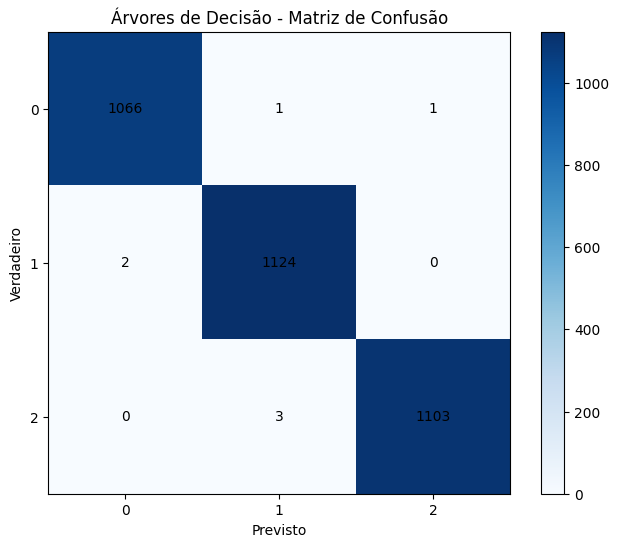

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Árvores de Decisão - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(
  n_estimators=100,
  criterion='entropy',
  min_samples_split=2,
  min_samples_leaf=1,
  random_state=42
)

modelRF.fit(x_train, y_train)

nome_modelo = "Random Forest"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():

    scores = cross_val_score(modelRF, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_RF = scores
print(f'Scores validação cruzada MLP: {scores_RF}')
print(f'Média dos scores: {scores_RF.mean()}')
print(f'Desvio padrão dos scores: {scores_RF.std()}')



Scores validação cruzada MLP: [0.99939394 0.99939394 1.         1.         1.         1.
 1.         1.         0.99939357 1.        ]
Média dos scores: 0.9998181449146678
Desvio padrão dos scores: 0.0002777882475580498


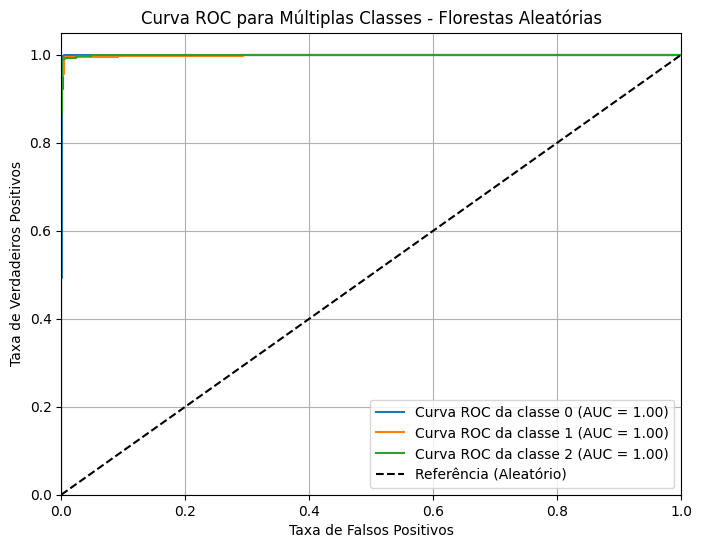

In [ ]:
class_names = modelRF.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Florestas Aleatórias')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictsRF = modelRF.predict(x_test)

accuracyRF = accuracy_score(y_test, predictsRF)
print(f'Precisão do modelo de Floresta Aleatória: {accuracyRF}')

reportRF = classification_report(y_test, predictsRF, digits=4)
print(f'\nRelatório de Classificação:\n{reportRF}')

Precisão do modelo de Floresta Aleatória: 0.9993939393939394

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9981    1.0000    0.9991      1068
           1     1.0000    0.9982    0.9991      1126
           2     1.0000    1.0000    1.0000      1106

    accuracy                         0.9994      3300
   macro avg     0.9994    0.9994    0.9994      3300
weighted avg     0.9994    0.9994    0.9994      3300



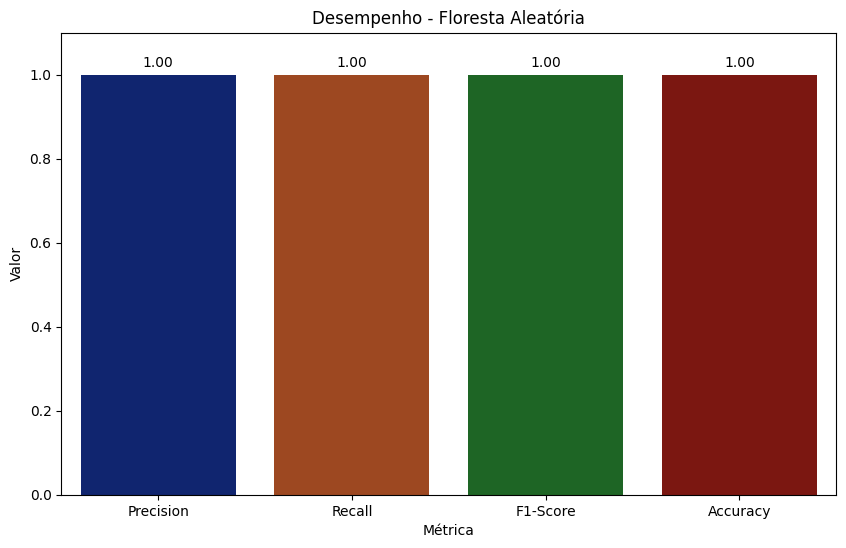

In [ ]:
y_pred = predictsRF
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_rf = df_metricas.copy()
df_metrics_rf.insert(loc=0, column='Modelo', value='Floresta Aleatória')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Floresta Aleatória')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [93]:
previsoes_algoritmos['Floresta Aleatória'] = y_pred

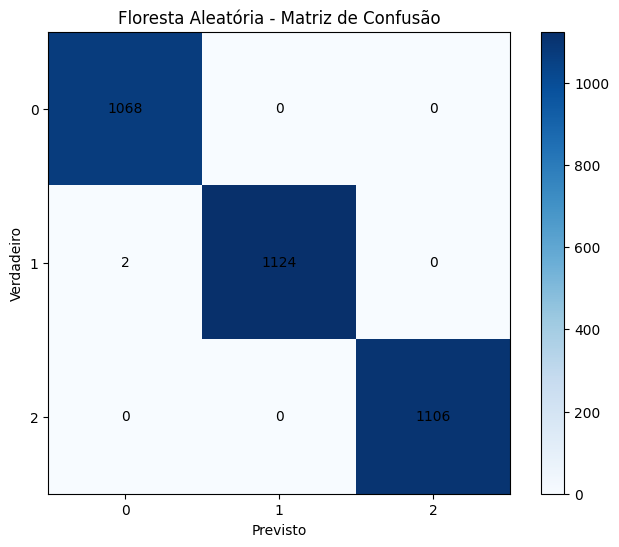

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Floresta Aleatória - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True, random_state=42, verbose=True)

svm.fit(x_train, y_train)


nome_modelo = "SVM"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(svm, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_SVM = scores



[LibSVM]

In [96]:
print(f'Scores validação cruzada SVM: {scores_SVM}')
print(f'Média dos scores: {scores_SVM.mean()}')
print(f'Desvio padrão dos scores: {scores_SVM.std()}')

Scores validação cruzada SVM: [0.98908947 0.98785198 0.98664952 0.98605921 0.9890814  0.98300518
 0.98542482 0.97754924 0.98604053 0.98542965]
Média dos scores: 0.9856181013987072
Desvio padrão dos scores: 0.003201229262440525


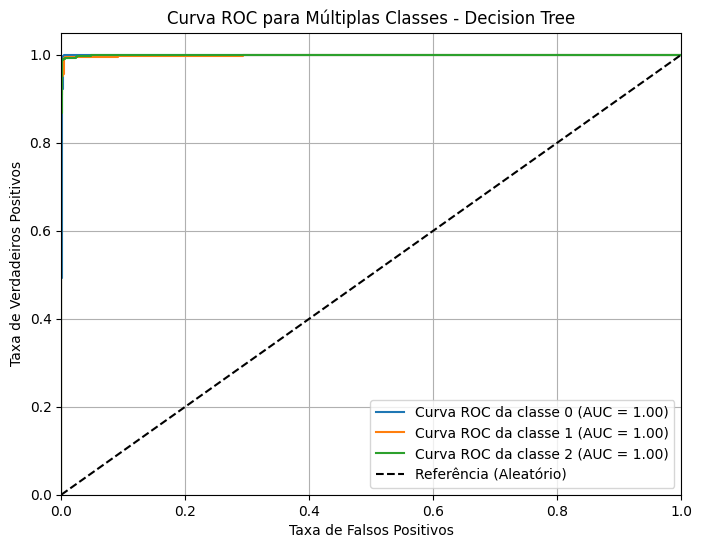

In [ ]:
class_names = svm.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictsSVM = svm.predict(x_test)

accuracySVM = accuracy_score(y_test, predictsSVM)
print(f'Precisão do modelo de SVM: {accuracySVM}')

reportSVM = classification_report(y_test, predictsSVM, digits=4)
print(f'\nRelatório de Classificação:\n{reportSVM}')

Precisão do modelo de SVM: 0.9827272727272728

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9926    0.9991    0.9958      1068
           1     0.9899    0.9618    0.9757      1126
           2     0.9664    0.9882    0.9772      1106

    accuracy                         0.9827      3300
   macro avg     0.9830    0.9830    0.9829      3300
weighted avg     0.9829    0.9827    0.9827      3300



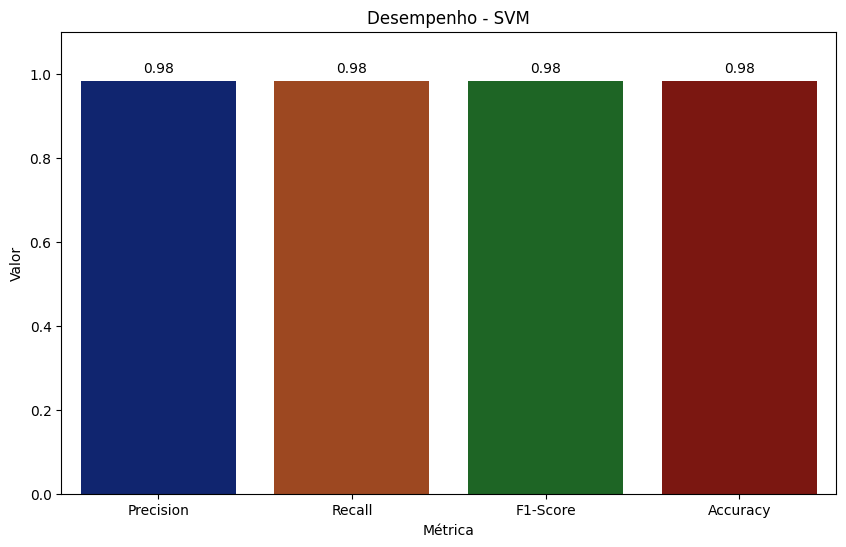

In [ ]:
y_pred = predictsSVM
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_svm = df_metricas.copy()
df_metrics_svm.insert(loc=0, column='Modelo', value='SVM')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - SVM')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [100]:
previsoes_algoritmos['SVM'] = y_pred

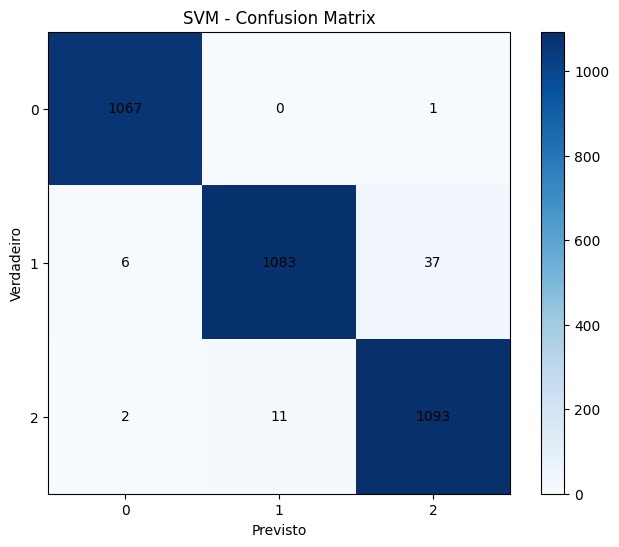

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Confusion Matrix')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
# AdaBoost Algoritmo
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
adb.fit(x_train, y_train)

nome_modelo = "AdaBoost"
X_dados = x 
Y_dados = y 

for nome_metrica, scorer in metricas_scoring.items():

    scores = cross_val_score(adb, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_adb = scores


print(f'Scores validação cruzada adaBoost: {scores_adb}')
print(f'Média dos scores: {scores_adb.mean()}')
print(f'Desvio padrão dos scores: {scores_adb.std()}')

Scores validação cruzada adaBoost: [0.98968811 0.98120054 0.97386329 0.97757159 0.99029945 0.98242838
 0.98605227 0.97938031 0.98847687 0.98663389]
Média dos scores: 0.9835594695969607
Desvio padrão dos scores: 0.005263217385621574


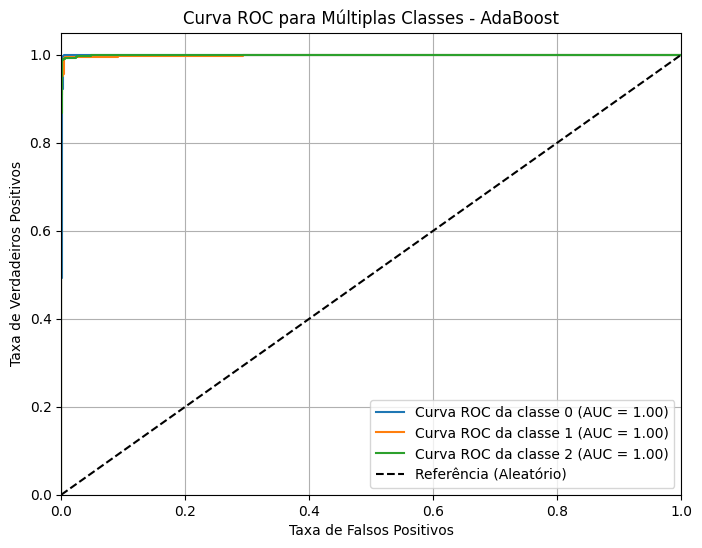

In [ ]:
class_names = adb.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - AdaBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictions_adb = adb.predict(x_test)
print(classification_report(y_test, predictions_adb))
accuracyadb = accuracy_score(y_test, predictions_adb)
print(f'Precisão do modelo de AdaBoost: {accuracyadb}')
reportadb = classification_report(y_test, predictions_adb, digits=4)
print(f'\nRelatório de Classificação:\n{reportadb}')

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1068
           1       0.99      0.97      0.98      1126
           2       0.98      0.99      0.99      1106

    accuracy                           0.99      3300
   macro avg       0.99      0.99      0.99      3300
weighted avg       0.99      0.99      0.99      3300

Precisão do modelo de AdaBoost: 0.9881818181818182

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9935    1.0000    0.9967      1068
           1     0.9919    0.9734    0.9825      1126
           2     0.9795    0.9919    0.9856      1106

    accuracy                         0.9882      3300
   macro avg     0.9883    0.9884    0.9883      3300
weighted avg     0.9882    0.9882    0.9882      3300



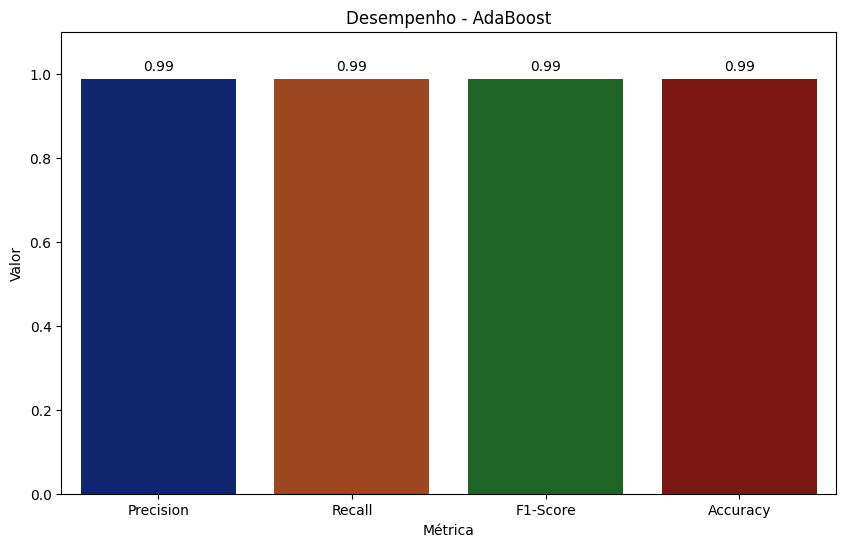

In [ ]:
y_pred = predictions_adb
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_adb = df_metricas.copy()
df_metrics_adb.insert(loc=0, column='Modelo', value='AdaBoost')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - AdaBoost')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [106]:
previsoes_algoritmos['AdaBoost'] = y_pred

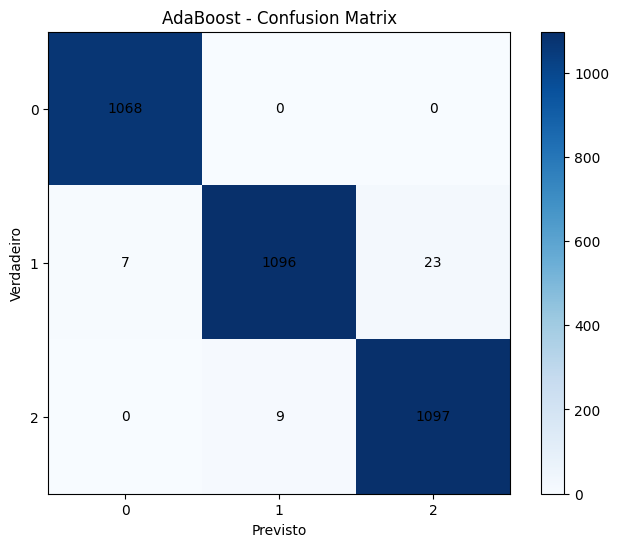

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('AdaBoost - Confusion Matrix')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [109]:
def create_dataset(data, look_back=1):
   X, y = [], []
   for i in range(len(data)-look_back-1):
       a = data[i:(i+look_back), 0]
       X.append(a)
       y.append(data[i + look_back, 0])
   return np.array(X), np.array(y)


look_back = 10
X, y = create_dataset(x, look_back)

In [110]:
X_gru = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [111]:
# Construir modelo GRU
model_gru_ts = Sequential()
model_gru_ts.add(GRU( 50 , return_sequences= True , input_shape=(look_back, 1 )))
model_gru_ts.add(GRU( 50 ))
model_gru_ts.add(Dense( 1 ))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [112]:
model_gru_ts.compile(optimizer='adam', loss='mean_squared_error')

In [113]:
model_gru_ts.fit(X_gru, y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.2501
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2003
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1942
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1950
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2000
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2102
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1926
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1994
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.2058
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1921
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1829
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1948
Epoch 13/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1957
Epoch 14/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1929
Epoch 15/100
516/516 ━━━━━━━━━━━━━━━━━━━

In [115]:
scaler_ts = StandardScaler()
scaler_ts.fit(x[:, 0].reshape(-1, 1))

,copy,True
,with_mean,True
,with_std,True


In [ ]:
predictions = model_gru_ts.predict(X)

predictions = scaler_ts.inverse_transform(predictions)
y_actual = scaler_ts.inverse_transform([y])

516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def make_gru_model(input_shape, num_classes, dropout_rate=0.5):

    model = Sequential()
    model.add(GRU(units=128,
                  input_shape=input_shape,
                  return_sequences=False,
                  implementation=2)) 

    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(num_classes, activation='softmax'))

    return model

print("\n\n---------------------------------------------")
print("INICIANDO VALIDAÇÃO CRUZADA MANUAL PARA GRU")
print("---------------------------------------------")

model_gru_name = "GRU"
n_folds = 10

gru_scores_temp = {nome_metrica: [] for nome_metrica in metricas_scoring.keys()}
input_shape = x_train_lstm.shape[1:]

for fold_no, (train_index, val_index) in enumerate(tqdm(kf.split(x_train_lstm, y_train_lstm), total=n_folds, desc=f"Folds do {model_gru_name}")):

    X_train_fold, X_val_fold = x_train_lstm[train_index], x_train_lstm[val_index]
    Y_train_fold, Y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

    model_gru = make_gru_model(input_shape, num_classes)

    model_gru.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=['accuracy'],
    )

    model_gru.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=32, verbose=1)

    y_pred_probs = model_gru.predict(X_val_fold, verbose=0)
    y_pred_labels = np.argmax(y_pred_probs, axis=1) # Converte probabilidades em rótulos
    y_true_labels = np.squeeze(Y_val_fold) # Rótulos reais no formato 1D

    gru_scores_temp['Accuracy'].append(accuracy_score(y_true_labels, y_pred_labels))
    gru_scores_temp['Precision'].append(precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))
    gru_scores_temp['Recall'].append(recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))
    gru_scores_temp['F1-Score'].append(f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))


for nome_metrica in metricas_scoring.keys():
    all_scores_cv[nome_metrica][model_gru_name] = np.array(gru_scores_temp[nome_metrica])

print("\nValidação Cruzada GRU concluída e scores salvos em 'all_scores_cv'.")

modelGRU_final = make_gru_model(input_shape, num_classes)
modelGRU_final.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

print("\nTreinando modelo GRU final...")
modelGRU_final.fit(x_train_lstm, y_train_lstm, epochs=50, batch_size=32, callbacks=callbacks, validation_split=0.2, verbose=0)

test_loss_gru, test_acc_gru = modelGRU_final.evaluate(x_test_lstm, y_test_lstm, verbose=0)
print(f"Acurácia final do GRU no teste: {test_acc_gru:.4f}")

modelGRU_final.save('best_model_gru.keras')
modelGRU = modelGRU_final 

y_pred_probs_gru = modelGRU.predict(x_test_lstm)
y_pred_gru = np.argmax(y_pred_probs_gru, axis=1)
previsoes_algoritmos['GRU'] = y_pred_gru

print("Modelo GRU final treinado e salvo como 'modelGRU'.")



---------------------------------------------
INICIANDO VALIDAÇÃO CRUZADA MANUAL PARA GRU
---------------------------------------------


Folds do GRU:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 70ms/step - accuracy: 0.7768 - loss: 0.5428
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.9251 - loss: 0.2037
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.9398 - loss: 0.1685
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.9500 - loss: 0.1456
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9485 - loss: 0.1329
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9632 - loss: 0.1020
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9635 - loss: 0.0980
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 26s 71ms/step - accuracy: 0.9766 - loss: 0.0725
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.9793 - loss: 0.0690
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 27s 71ms/step - accuracy: 0.9786 - loss: 0.0802
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.9810 - loss: 0.0632
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  10%|█         | 1/10 [21:52<3:16:52, 1312.53s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.7718 - loss: 0.5574
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9245 - loss: 0.2061
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.9305 - loss: 0.1854
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9483 - loss: 0.1378
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9514 - loss: 0.1352
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.9619 - loss: 0.1058
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9586 - loss: 0.1136
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.9659 - loss: 0.0895
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9628 - loss: 0.1023
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9743 - loss: 0.0712
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.9720 - loss: 0.0807
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  20%|██        | 2/10 [44:24<2:58:06, 1335.77s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step - accuracy: 0.7695 - loss: 0.5454
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9178 - loss: 0.2117
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9329 - loss: 0.1712
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 32s 86ms/step - accuracy: 0.9386 - loss: 0.1695
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 30s 82ms/step - accuracy: 0.9440 - loss: 0.1435
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.9600 - loss: 0.1183
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 30s 79ms/step - accuracy: 0.9609 - loss: 0.1107
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 76ms/step - accuracy: 0.9486 - loss: 0.1413
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9659 - loss: 0.0933
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9763 - loss: 0.0685
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9756 - loss: 0.0767
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  30%|███       | 3/10 [1:08:39<2:42:11, 1390.26s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 73ms/step - accuracy: 0.7785 - loss: 0.5686
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.9289 - loss: 0.1925
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.9331 - loss: 0.1741
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.9341 - loss: 0.1726
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.9168 - loss: 0.1990
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.9541 - loss: 0.1328
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.9609 - loss: 0.1076
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 29s 79ms/step - accuracy: 0.9655 - loss: 0.0984
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 28s 77ms/step - accuracy: 0.9697 - loss: 0.0869
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.9635 - loss: 0.0995
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9730 - loss: 0.0818
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  40%|████      | 4/10 [1:30:04<2:14:51, 1348.59s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.7641 - loss: 0.5723
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.9250 - loss: 0.1934
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9380 - loss: 0.1667
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9504 - loss: 0.1416
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.9498 - loss: 0.1374
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9555 - loss: 0.1203
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9627 - loss: 0.1052
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9552 - loss: 0.1242
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9695 - loss: 0.0842
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.9711 - loss: 0.0825
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.9643 - loss: 0.1071
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  50%|█████     | 5/10 [1:50:51<1:49:20, 1312.14s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.7828 - loss: 0.5539
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9240 - loss: 0.2043
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9368 - loss: 0.1744
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9506 - loss: 0.1373
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9565 - loss: 0.1245
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9527 - loss: 0.1340
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9615 - loss: 0.1002
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9658 - loss: 0.0938
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9741 - loss: 0.0772
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9792 - loss: 0.0650
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9870 - loss: 0.0430
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  60%|██████    | 6/10 [2:10:35<1:24:34, 1268.59s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.7508 - loss: 0.5729
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9037 - loss: 0.2330
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9300 - loss: 0.1861
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.9492 - loss: 0.1472
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9427 - loss: 0.1565
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9431 - loss: 0.1546
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9581 - loss: 0.1137
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9627 - loss: 0.0963
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9766 - loss: 0.0786
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9755 - loss: 0.0816
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9802 - loss: 0.0753
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  70%|███████   | 7/10 [2:29:56<1:01:39, 1233.20s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.7815 - loss: 0.5405
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9272 - loss: 0.1931
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9376 - loss: 0.1767
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9512 - loss: 0.1426
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9419 - loss: 0.1567
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9473 - loss: 0.1414
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9630 - loss: 0.1069
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9688 - loss: 0.0908
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9593 - loss: 0.1139
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9793 - loss: 0.0616
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9725 - loss: 0.0904
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  80%|████████  | 8/10 [2:49:25<40:25, 1212.76s/it]  

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.7906 - loss: 0.5359
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.9231 - loss: 0.1969
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9304 - loss: 0.1881
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9461 - loss: 0.1427
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9540 - loss: 0.1329
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.9594 - loss: 0.1180
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9518 - loss: 0.1448
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9591 - loss: 0.1156
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9722 - loss: 0.0812
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9709 - loss: 0.0843
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9733 - loss: 0.0744
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU:  90%|█████████ | 9/10 [3:07:53<19:40, 1180.10s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.7896 - loss: 0.5472
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.9251 - loss: 0.2072
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9386 - loss: 0.1794
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9471 - loss: 0.1425
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9585 - loss: 0.1205
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9585 - loss: 0.1149
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9572 - loss: 0.1134
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9630 - loss: 0.1024
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9708 - loss: 0.0816
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9768 - loss: 0.0759
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.9805 - loss: 0.0657
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 

Folds do GRU: 100%|██████████| 10/10 [3:25:51<00:00, 1235.10s/it]
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Validação Cruzada GRU concluída e scores salvos em 'all_scores_cv'.

Treinando modelo GRU final...
Restoring model weights from the end of the best epoch: 50.
Acurácia final do GRU no teste: 0.9924
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Modelo GRU final treinado e salvo como 'modelGRU'.


In [118]:
dt_test = pd.DataFrame(all_scores_cv)
dt_test.tail()

,Accuracy,Precision,Recall,F1-Score
Decision Tree,"[0.9981818181818182, 0.9981818181818182, 0.998...","[0.9981851179673322, 0.9981916817359855, 0.998...","[0.9981818181818182, 0.9987878787878788, 0.998...","[0.9981818151738193, 0.9981818046580512, 0.998..."
Random Forest,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993950393224441, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993939388930625, 0.9993939388930625, 1.0, ..."
SVM,"[0.9890909090909091, 0.9878787878787879, 0.986...","[0.9892714797939205, 0.9880622476138956, 0.986...","[0.9890909090909091, 0.9878787878787879, 0.986...","[0.9890894698716123, 0.9878519754717088, 0.986..."
AdaBoost,"[0.9896969696969697, 0.9812121212121212, 0.973...","[0.9896868934595214, 0.9812674071884916, 0.974...","[0.9896969696969697, 0.9812121212121212, 0.973...","[0.9896881100950988, 0.9812005412345856, 0.973..."
GRU,"[0.9893939393939394, 0.9954545454545455, 0.996...","[0.9894728976041908, 0.9954597942473232, 0.996...","[0.9893939393939394, 0.9954545454545455, 0.996...","[0.9893908565402046, 0.9954563210040326, 0.996..."


In [132]:
previsoes_df = pd.DataFrame(previsoes_algoritmos)
previsoes_df.tail()

,LSTM,MLP,Naive Bayes,Arvore de Decisão,Floresta Aleatória,SVM,AdaBoost,GRU
3295,0,0,0,0,0,0,0,0
3296,0,0,0,0,0,0,0,0
3297,0,0,0,0,0,0,0,0
3298,1,1,1,1,1,1,1,1
3299,2,2,2,2,2,2,2,2


In [133]:
all_metrics_algorithm = pd.concat([df_metrics_lstm,df_metrics_mlp,df_metrics_dt, df_metrics_rf, df_metrics_svm, df_metrics_adb])
all_metrics_algorithm.head()

,Modelo,Métrica,Valor
0,MLP,Precision,0.992442
1,MLP,Recall,0.992424
2,MLP,F1-Score,0.992423
3,MLP,Accuracy,0.992424
0,Arvore de Decisão,Precision,0.997880


In [134]:
data_metrics = all_metrics_algorithm.reset_index(drop=True)

In [ ]:
data_metrics.to_csv('/poseiddon/GROUP A/CONFIGURATION 3/metricas_algoritmos.csv')
previsoes_df.to_csv('/poseiddon/GROUP A/CONFIGURATION 3/previsoes_algoritmos.csv')

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

modelos = {
    "MLP": modelMLP,
    "SVM": svm,
    "Árvores de Decisão": predictsDT,
    "Florestas Aleatórias": predictsRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

scores_f1_por_algoritmo = {
    "MLP": modelMLP,
    "SVM": svm,
    "Árvores de Decisão": predictsDT,
    "Florestas Aleatórias": predictsRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

In [139]:
data_score = pd.DataFrame(all_scores_cv)
data_score.head()

,Accuracy,Precision,Recall,F1-Score
LSTM,0.9818181818181818,0.9818529878684666,0.9818181818181818,0.9818131747188198
MLP,"[0.9963636363636363, 0.9939393939393939, 0.989...","[0.9927499648811124, 0.9951667859629365, 0.992...","[0.9957575757575757, 0.9945454545454545, 0.992...","[0.997575205609361, 0.9945414146603953, 0.9909..."
Naive Bayes,"[0.9139393939393939, 0.9206060606060606, 0.910...","[0.9256601392259036, 0.9277623191235757, 0.921...","[0.9139393939393939, 0.9206060606060606, 0.910...","[0.9114226004138924, 0.9187926252234531, 0.908..."
Decision Tree,"[0.9981818181818182, 0.9981818181818182, 0.998...","[0.9981851179673322, 0.9981916817359855, 0.998...","[0.9981818181818182, 0.9987878787878788, 0.998...","[0.9981818151738193, 0.9981818046580512, 0.998..."
Random Forest,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993950393224441, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993939388930625, 0.9993939388930625, 1.0, ..."


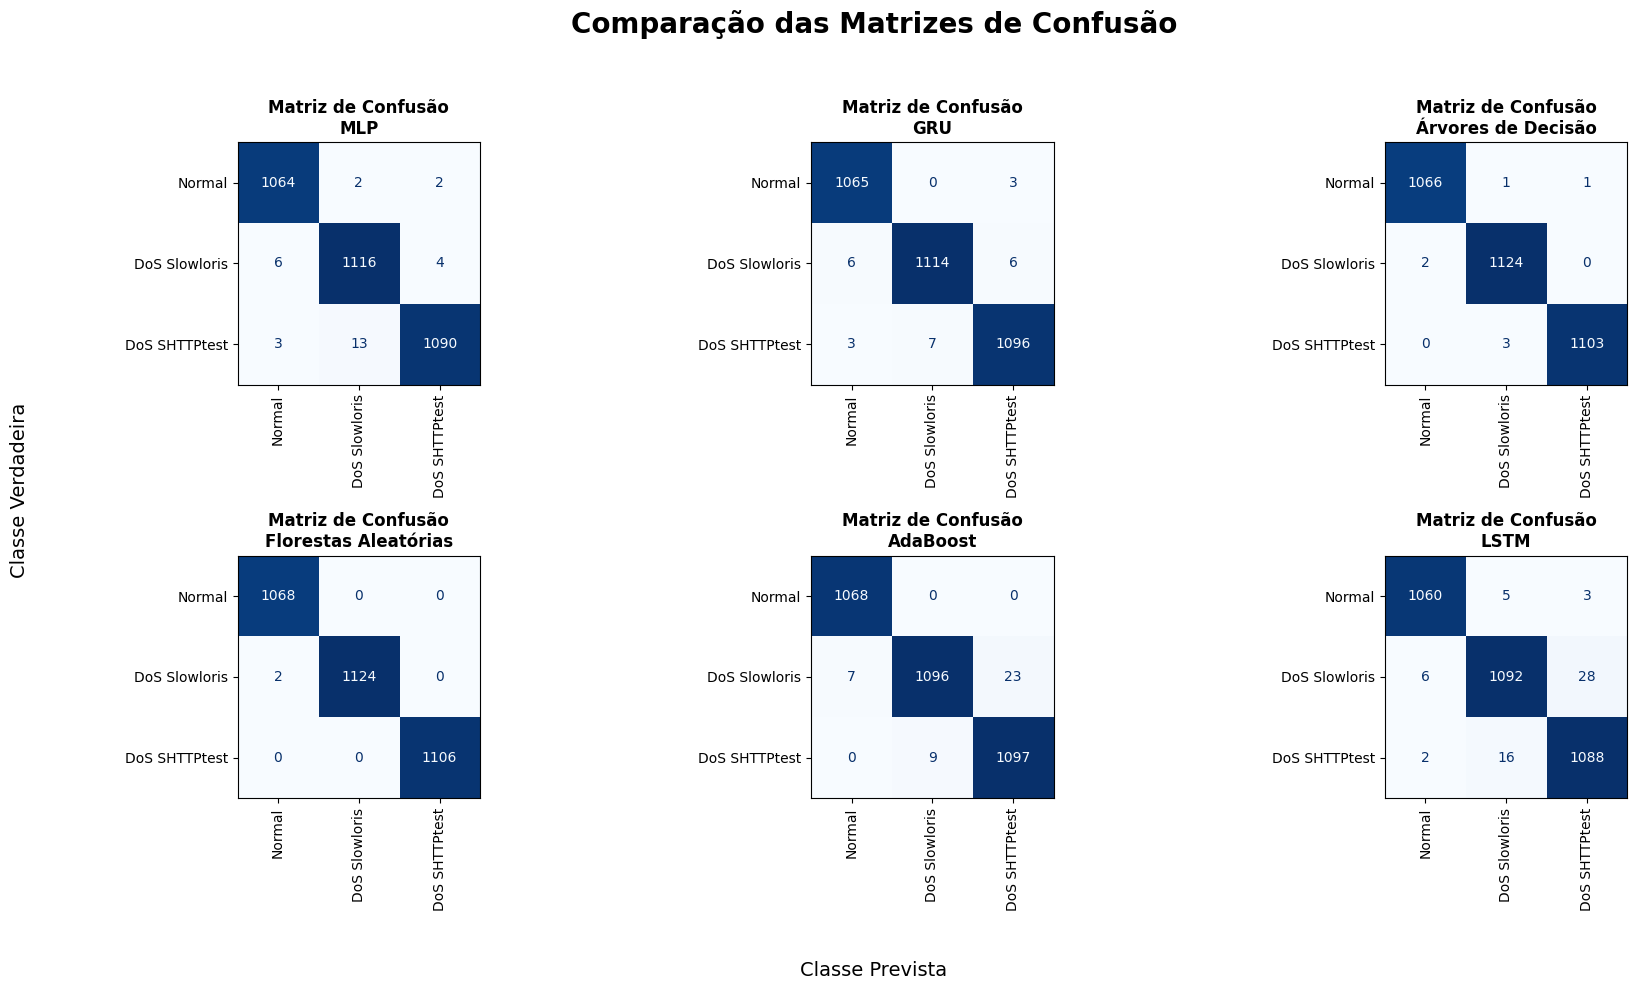

In [ ]:
modelos = {
    "MLP": modelMLP,
    "GRU": modelGRU, 
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

nomes_classes = ['Normal', 'DoS Slowloris', 'DoS SHTTPtest']

x_test_sklearn = x_test 
x_test_lstm = x_test_lstm 

predicoes = {}

for nome, modelo in modelos.items():
    if nome in ["LSTM", "GRU"]:
        y_pred_probs = modelo.predict(x_test_lstm, verbose=0)
        predicoes[nome] = np.argmax(y_pred_probs, axis=1)

    else:
        predicoes[nome] = modelo.predict(x_test_sklearn)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

y_true_labels_1d = np.squeeze(y_test_lstm)


for ax, (nome_modelo, modelo) in zip(axes.ravel(), modelos.items()):

    if hasattr(modelo, 'classes_'):
        model_classes = modelo.classes_
    else: 
        model_classes = np.arange(len(nomes_classes))

    cm = confusion_matrix(y_true_labels_1d, predicoes[nome_modelo], labels=model_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nomes_classes)
    disp.plot(ax=ax, cmap='Blues', colorbar=False, xticks_rotation='vertical')

    ax.set_title(f"Matriz de Confusão\n{nome_modelo}", fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.supxlabel('Classe Prevista', fontsize=14)
fig.supylabel('Classe Verdadeira', fontsize=14)
fig.suptitle("Comparação das Matrizes de Confusão", fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

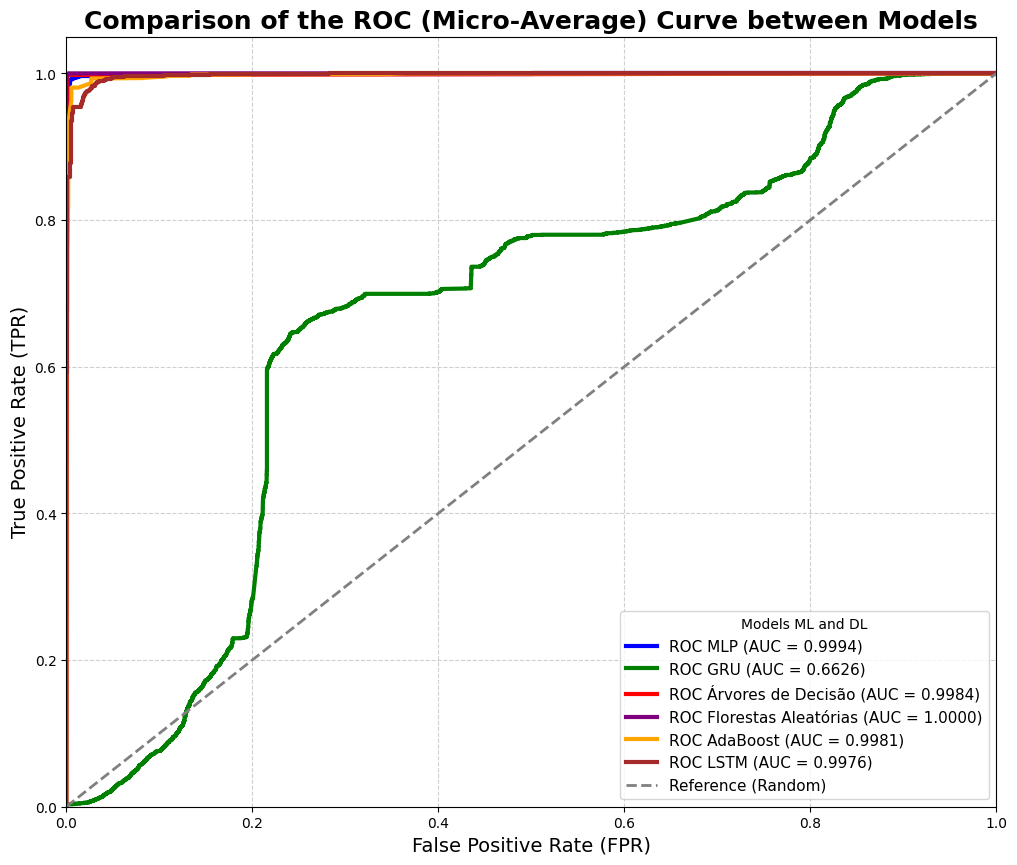

In [ ]:
from sklearn.preprocessing import label_binarize
import logging

# Configuração de logs
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

modelos = {
    "MLP": modelMLP,
    "GRU": model_gru, 
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM,
}

x_test_sklearn = x_test
x_test_lstm = x_test_lstm
y_test_reais = y_test
class_names = np.unique(y_test_reais)
y_test_bin = label_binarize(y_test_reais, classes=class_names)

plt.figure(figsize=(12, 10))
cores = ['blue', 'green', 'red', 'purple', 'orange', 'brown']


for i, (nome_modelo, modelo) in enumerate(modelos.items()):

    y_pred_prob = None

    if nome_modelo in ["LSTM", "GRU"]:
        y_pred_prob = modelo.predict(x_test_lstm, verbose=0)
    elif hasattr(modelo, 'predict_proba'):
        y_pred_prob = modelo.predict_proba(x_test_sklearn)
    else:
        logging.warning(f"O modelo {nome_modelo} foi ignorado por não possuir método de probabilidades.")
        continue

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        color=cores[i % len(cores)], 
        lw=3, 
        label=f'ROC {nome_modelo} (AUC = {roc_auc:.4f})' 
    )

plt.plot(
    [0, 1],
    [0, 1],
    color='gray',
    lw=2,
    linestyle='--',
    label='Reference (Random)'
)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Comparison of the ROC (Micro-Average) Curve between Models', fontsize=18, fontweight='bold')

# Legenda
plt.legend(loc="lower right", fontsize=11, title="Models ML and DL")

# Grid
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-664070267.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

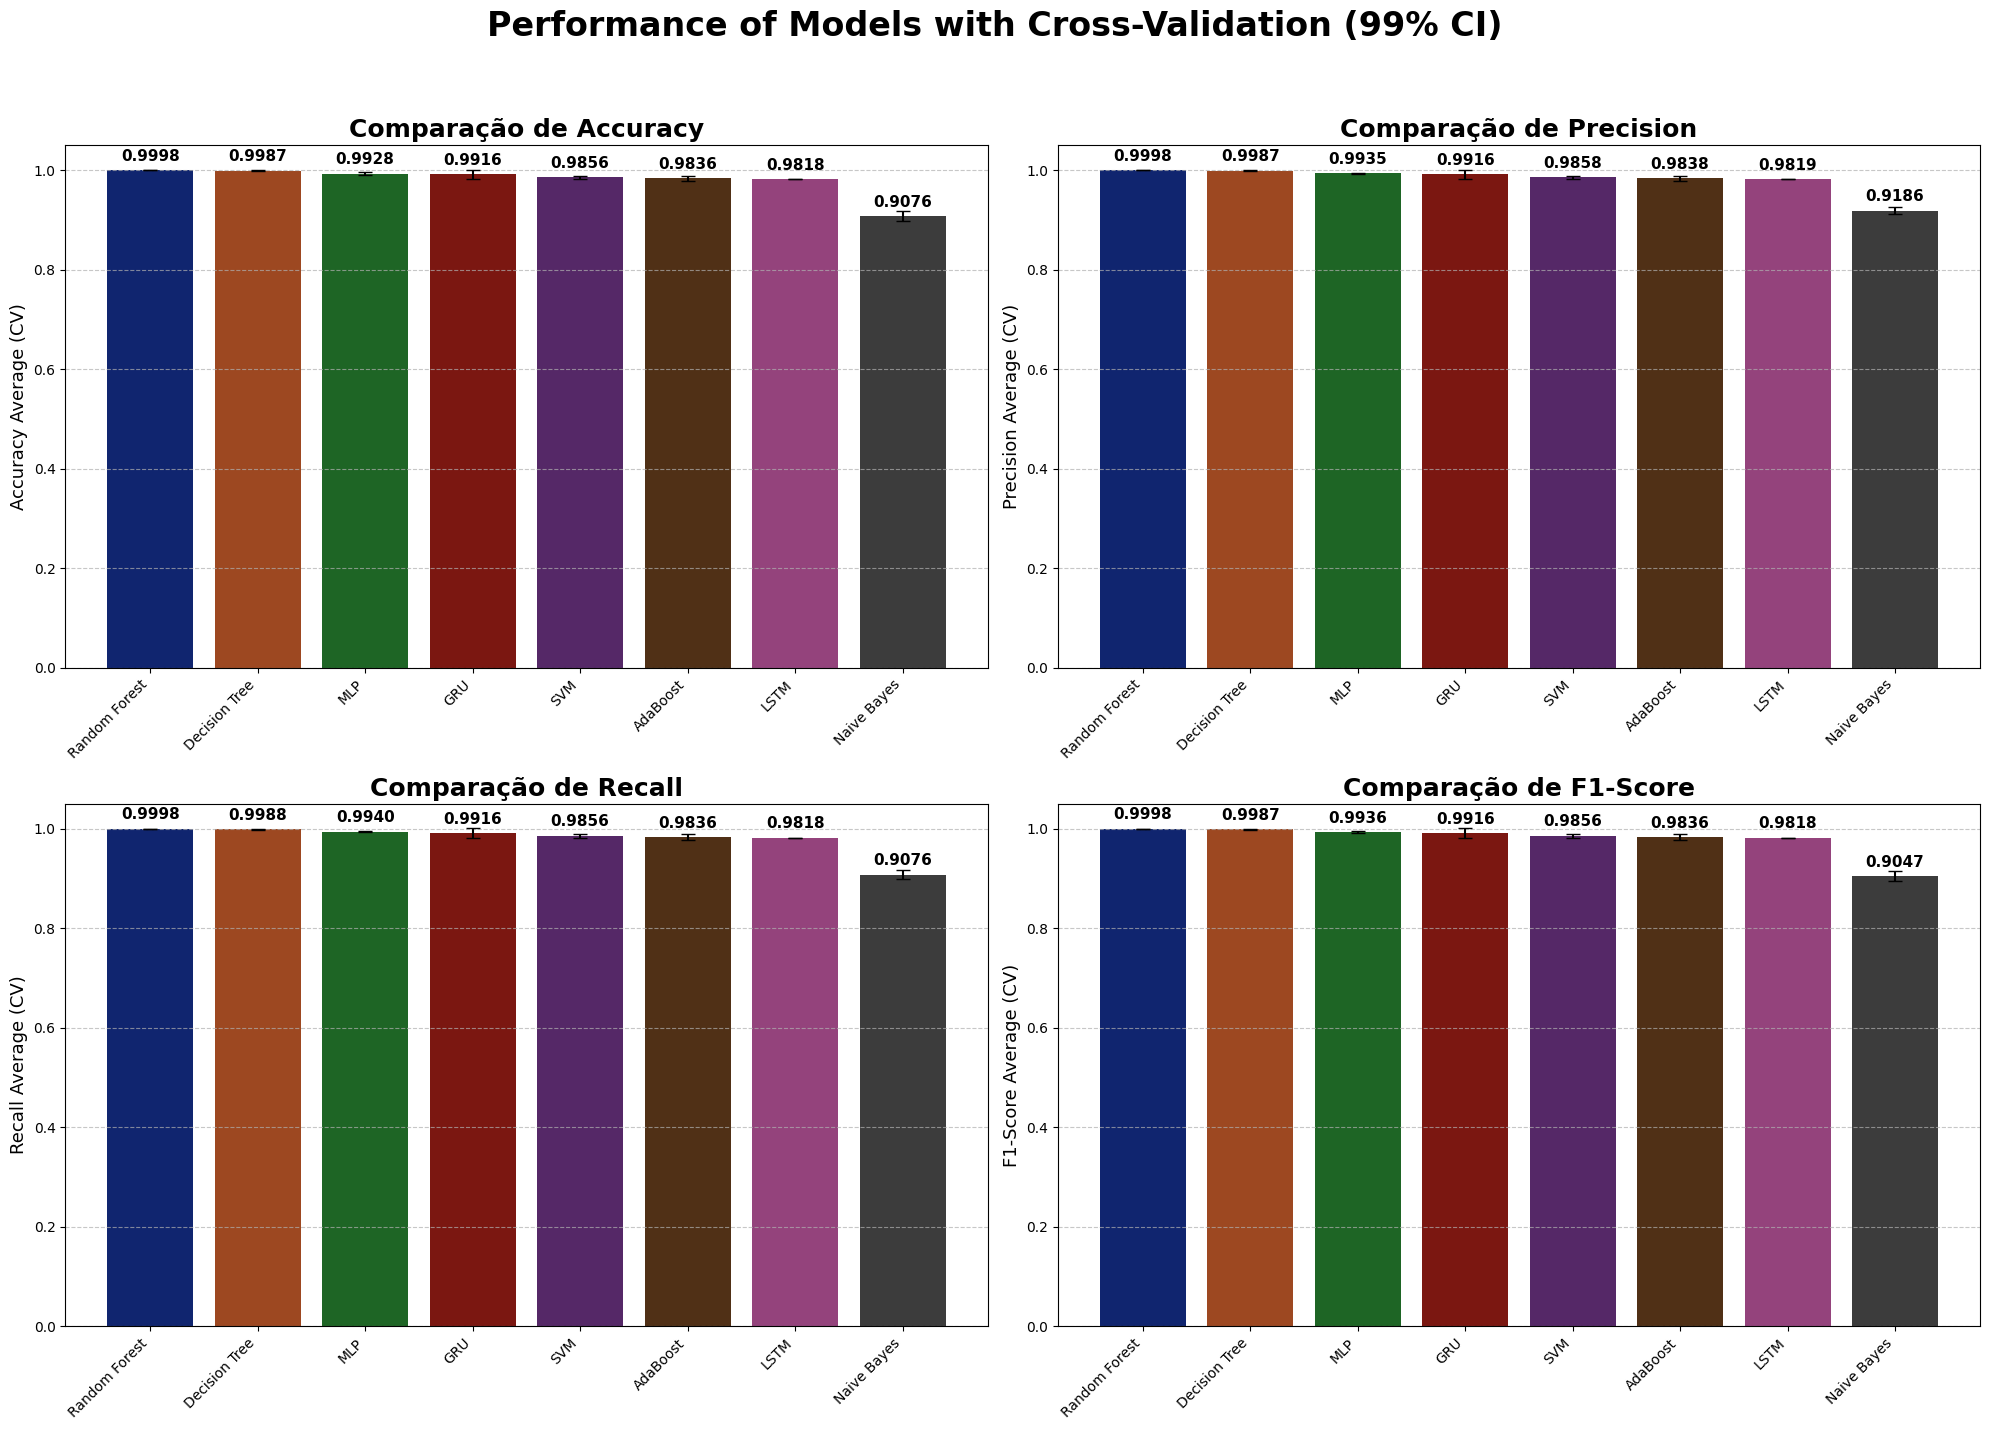

In [ ]:
import seaborn as sns
from scipy.stats import sem, t 

def calcular_ic_95(dados):
    dados = np.array(dados)

    if dados.size < 2:
        return 0
    return t.ppf(0.995, dados.size - 1) * sem(dados)

metricas_a_plotar = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores_globais = all_scores_cv


plt.figure(figsize=(20, 15))

for i, metrica in enumerate(metricas_a_plotar, 1):
    plt.subplot(2, 2, i) 

    scores_da_metrica_atual = scores_globais[metrica]
    dados_plot = []

    for nome_modelo, scores in scores_da_metrica_atual.items():
        scores = np.array(scores)

        if scores.size == 0:
             continue

        media = np.mean(scores)
        ic = calcular_ic_95(scores) 

        dados_plot.append({"Algoritmo": nome_modelo, "Média": media, "IC": ic})

    if not dados_plot:
        plt.title(f"Dados indisponíveis para {metrica}", fontsize=16)
        continue

    df_plot = pd.DataFrame(dados_plot).sort_values(by="Média", ascending=False)

    ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")

    plt.errorbar(x=df_plot["Algoritmo"], y=df_plot["Média"], yerr=df_plot["IC"],
                 fmt='none', c='black', capsize=5, lw=1.5)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points', fontsize=11, fontweight='bold')


    plt.title(f"Comparação de {metrica}", fontsize=18, fontweight='bold')
    plt.ylim(0, 1.05) 
    plt.xlabel(None)
    plt.ylabel(f"{metrica} Average (CV)", fontsize=13)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Performance of Models with Cross-Validation (99% CI)", fontsize=24, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

/tmp/ipython-input-3103770357.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-3103770357.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-3103770357.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-3103770357.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

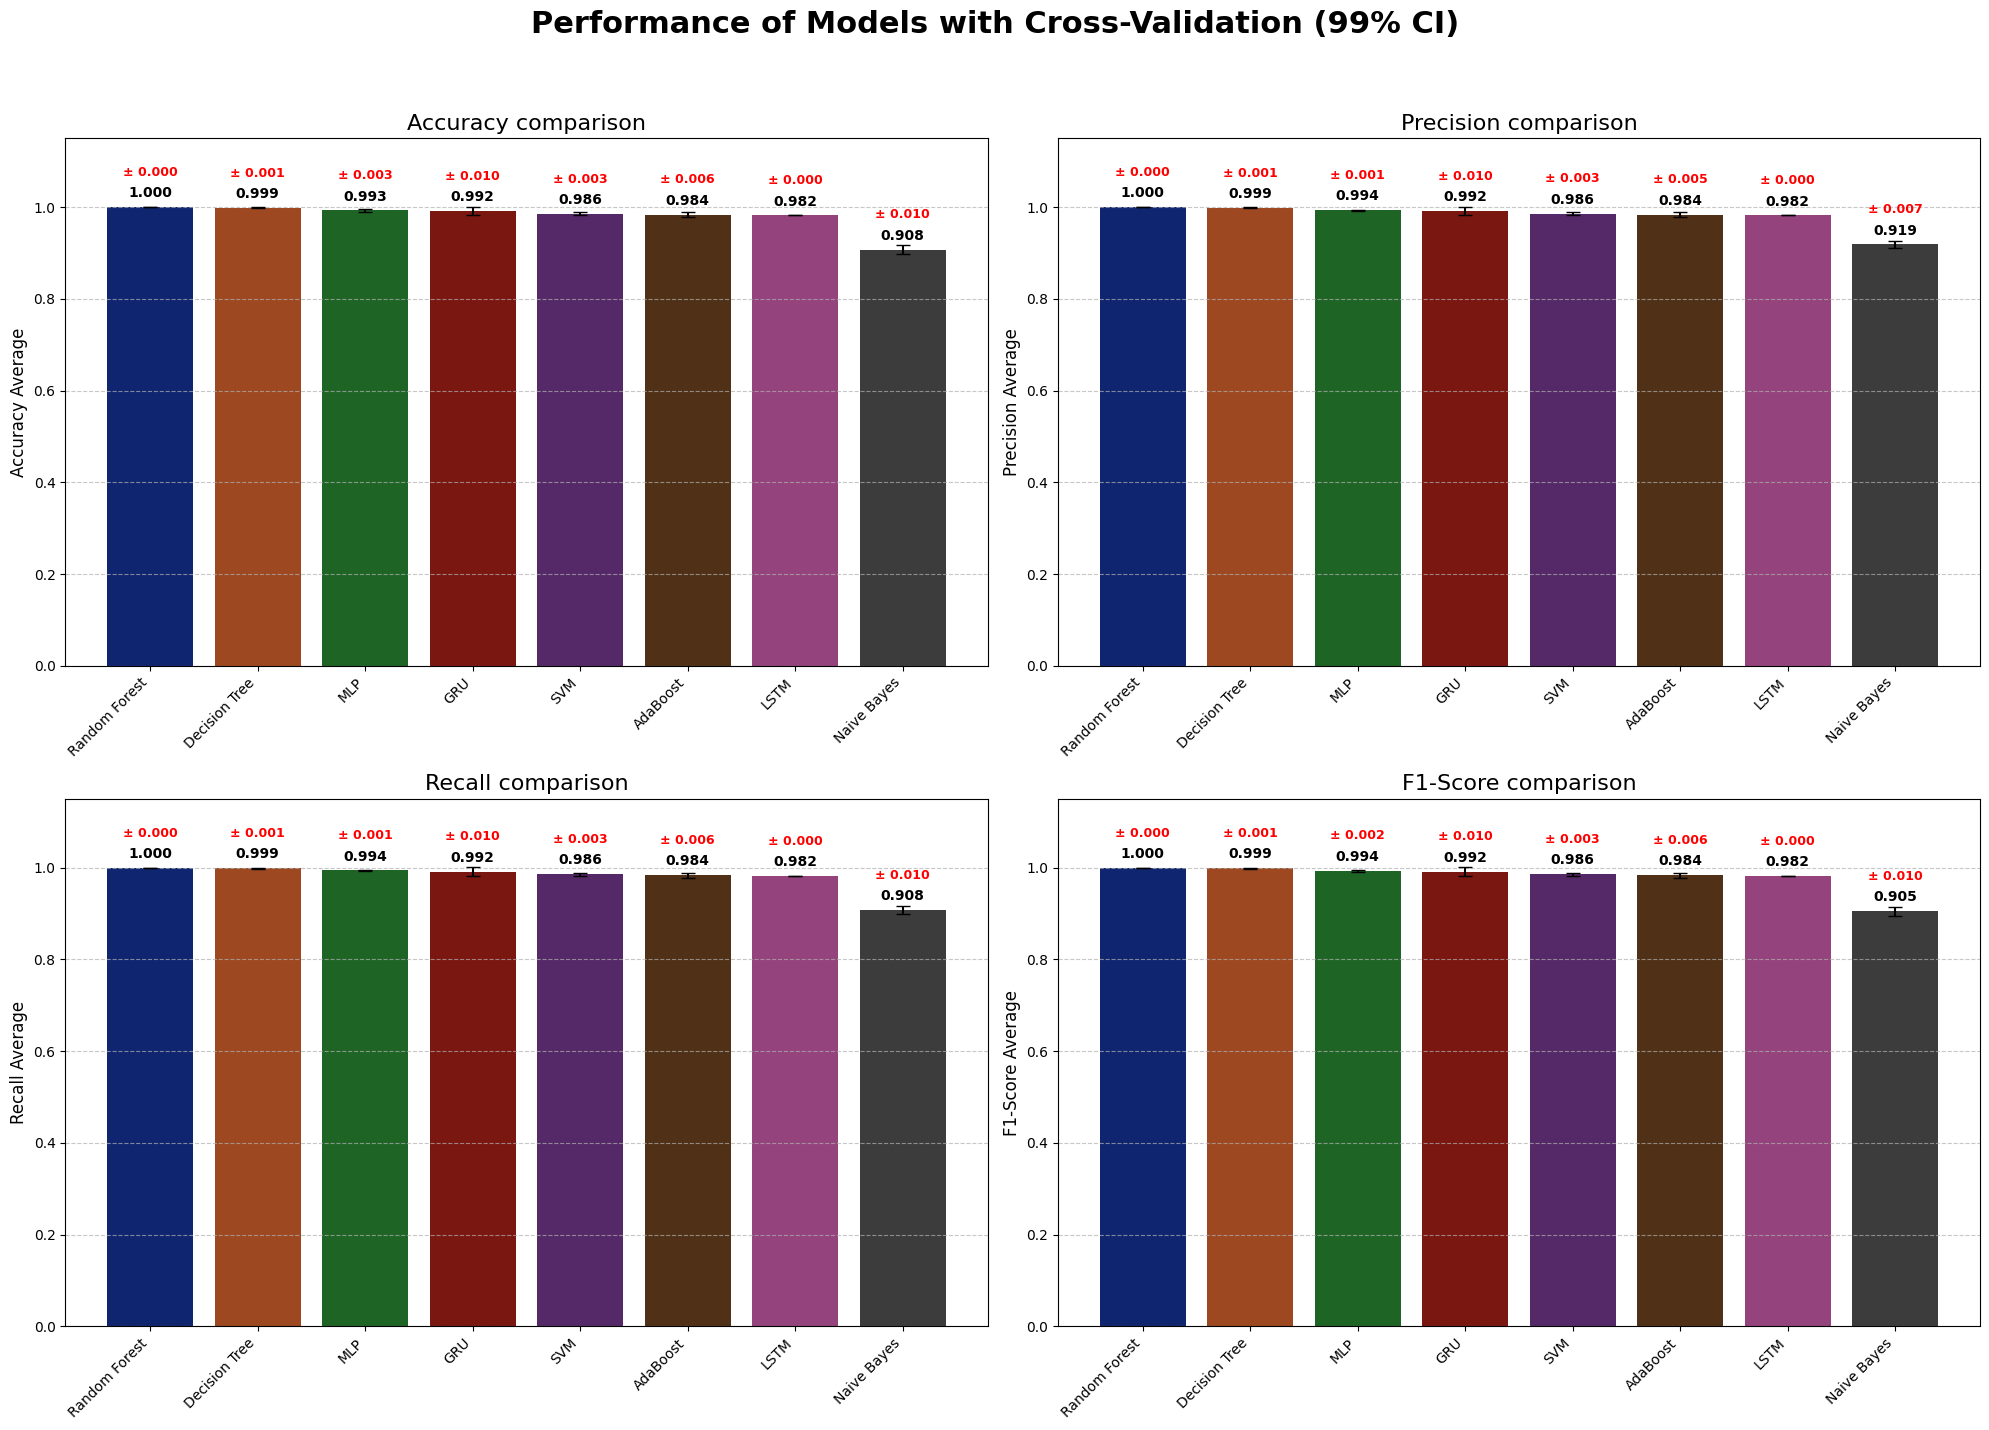

In [ ]:
metricas_a_plotar = ["Accuracy", "Precision", "Recall", "F1-Score"]

plt.figure(figsize=(20, 15))

for i, metrica in enumerate(metricas_a_plotar, 1):
    plt.subplot(2, 2, i) # Cria o i-ésimo subplot

    scores_da_metrica_atual = all_scores_cv[metrica]

    dados_plot = []
    for nome_modelo, scores in scores_da_metrica_atual.items():
        media = np.mean(scores)
        ic = calcular_ic_95(scores)
        dados_plot.append({"Algoritmo": nome_modelo, "Média": media, "IC": ic})

    df_plot = pd.DataFrame(dados_plot).sort_values(by="Média", ascending=False)

    ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")

    plt.errorbar(x=df_plot["Algoritmo"], y=df_plot["Média"], yerr=df_plot["IC"],
                 fmt='none', c='black', capsize=5)

    for j, p in enumerate(ax.patches):
        media_valor = p.get_height()

        ic_valor = df_plot['IC'].iloc[j]

        ax.annotate(f'{media_valor:.3f}',
                    (p.get_x() + p.get_width() / 2., media_valor),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points',
                    fontsize=10, fontweight='bold')

        ax.annotate(f'± {ic_valor:.3f}',
                    (p.get_x() + p.get_width() / 2., media_valor), 
                    ha='center', va='center',
                    xytext=(0, 25), textcoords='offset points', 
                    fontsize=9, color='red', fontweight='bold')

    plt.title(f"{metrica} comparison", fontsize=16)
    plt.ylim(0, 1.15) 
    plt.xlabel(None)
    plt.ylabel(f"{metrica} Average", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("Performance of Models with Cross-Validation (99% CI)", fontsize=22, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
joblib.dump(modelMLP, '/poseiddon/GROUP A/CONFIGURATION 3/CICIDS2017_mlp.joblib')
joblib.dump(svm, '/poseiddon/GROUP A/CONFIGURATION 3/CICIDS2017_svm.joblib')
modelLSTM.save('/poseiddon/GROUP A/CONFIGURATION 3/CICIDS2017_lstm.h5')
modelLSTM.save('/poseiddon/GROUP A/CONFIGURATION 3/CICIDS2017_lstm.keras')
model_gru.save('/poseiddon/GROUP A/CONFIGURATION 3/CICIDS2017_gru.h5')
model_gru.save('/poseiddon/GROUP A/CONFIGURATION 3/CICIDS2017_gru.keras')
joblib.dump(modelDT, '/poseiddon/GROUP A/CONFIGURATION 3/CICIDS2017_dt.joblib')
joblib.dump(modelRF, '/poseiddon/GROUP A/CONFIGURATION 3/CICIDS2017_rf.joblib')
joblib.dump(adb, '/poseiddon/GROUP A/CONFIGURATION 3/CICIDS2017_adb.joblib')

['/content/drive/MyDrive/Colab Notebooks/Wiley-POSEIDDON/CEN33/CICIDS2017_adb.joblib']

In [ ]:
modelLSTM_carregado_keras = keras.models.load_model('/poseiddon/GROUP A/CONFIGURATION 3/CICIDS2017_lstm.keras')
modelGRU_carregado_keras = keras.models.load_model('/poseiddon/GROUP A/CONFIGURATION 3/CICIDS2017_gru.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
data_score.to_csv('/poseiddon/GROUP A/CONFIGURATION 3/all_scores_metrics.csv', index=False)

In [ ]:
import time
import numpy as np

def calcular_tempo_inferencia(modelo, dados_para_teste):

  modelo.predict(dados_para_teste[:1])

  tempos = []
  for _ in range(100): 
      inicio = time.perf_counter()
      modelo.predict(dados_para_teste)
      fim = time.perf_counter()
      tempos.append(fim - inicio)

  tempo_medio_lote_ms = np.mean(tempos) * 1000
  tempo_por_previsao_ms = tempo_medio_lote_ms / len(dados_para_teste)

  return tempo_por_previsao_ms

In [ ]:
dicionario_modelos = {
    "MLP": modelMLP,
    "GRU": model_gru,
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM,
}

amostra_base_2d = x_test[:1000]

amostra_base_3d = amostra_base_2d.reshape((amostra_base_2d.shape[0], amostra_base_2d.shape[1], 1))

tempos_resultados = {}

for nome_modelo, objeto_modelo in tqdm(dicionario_modelos.items()):
    print(f"Calculando tempo para o modelo: {nome_modelo}...")

    if nome_modelo in ["LSTM", "GRU"]:
        dados_para_teste = amostra_base_3d 
    else:
        dados_para_teste = amostra_base_2d 

    tempo_ms = calcular_tempo_inferencia(objeto_modelo, dados_para_teste)

    tempos_resultados[nome_modelo] = tempo_ms

    print(f"-> Tempo por previsão: {tempo_ms:.6f} ms\n")

print("\n--- Dicionário Final com os Tempos de Inferência ---")
print(tempos_resultados)

  0%|          | 0/6 [00:00<?, ?it/s]

Calculando tempo para o modelo: MLP...


 17%|█▋        | 1/6 [00:01<00:05,  1.09s/it]

-> Tempo por previsão: 0.010906 ms

Calculando tempo para o modelo: GRU...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
32/32 ━

 33%|███▎      | 2/6 [00:53<02:04, 31.08s/it]

-> Tempo por previsão: 0.519422 ms

Calculando tempo para o modelo: Árvores de Decisão...
-> Tempo por previsão: 0.000164 ms

Calculando tempo para o modelo: Florestas Aleatórias...


 67%|██████▋   | 4/6 [00:53<00:23, 11.83s/it]

-> Tempo por previsão: 0.007350 ms

Calculando tempo para o modelo: AdaBoost...


 83%|████████▎ | 5/6 [00:54<00:08,  8.42s/it]

-> Tempo por previsão: 0.008045 ms

Calculando tempo para o modelo: LSTM...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 

100%|██████████| 6/6 [01:29<00:00, 14.99s/it]

-> Tempo por previsão: 0.351322 ms


--- Dicionário Final com os Tempos de Inferência ---
{'MLP': 0.010905996970031993, 'GRU': 0.5194221881102203, 'Árvores de Decisão': 0.00016390037984820083, 'Florestas Aleatórias': 0.00735017817998596, 'AdaBoost': 0.008044846450029581, 'LSTM': 0.3513216824700066}


In [ ]:
df_tempos = pd.DataFrame(list(tempos_resultados.items()), columns=['Modelo', 'Tempo de Detecção (ms)'])
df_tempos = df_tempos.sort_values(by='Tempo de Detecção (ms)', ascending=True)

In [ ]:
df_tempos.to_csv('/poseiddon/GROUP A/CONFIGURATION 3/tempos_deteccao_cic2017.csv', index=False)

/tmp/ipython-input-2164449025.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


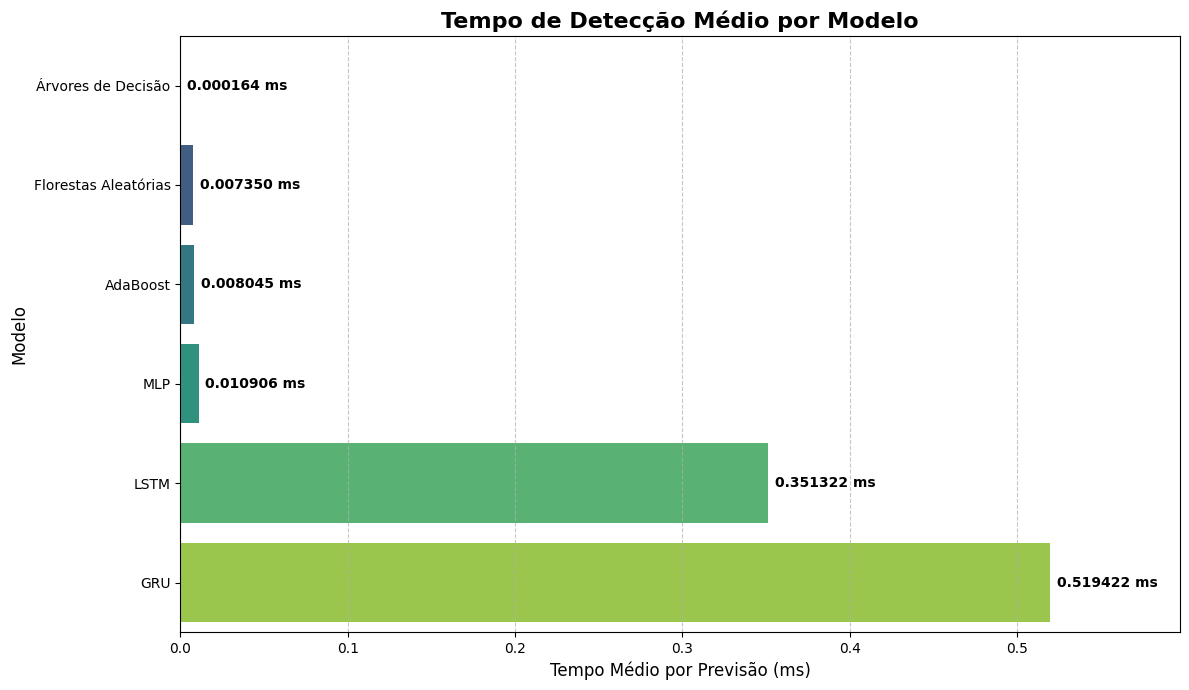

In [ ]:
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x='Tempo de Detecção (ms)',
    y='Modelo',
    data=df_tempos,
    palette='viridis',
    orient='h' 
)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.6f} ms',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha = 'left', va = 'center',
                xytext = (5, 0),
                textcoords = 'offset points',
                fontsize=10, fontweight='bold')

plt.title('Tempo de Detecção Médio por Modelo', fontsize=16, fontweight='bold')
plt.xlabel('Tempo Médio por Previsão (ms)', fontsize=12)
plt.ylabel('Modelo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xlim(0, df_tempos['Tempo de Detecção (ms)'].max() * 1.15)

plt.tight_layout()
plt.show()

In [155]:
df_resultados = data_score.copy()

In [156]:
df_resultados.rename(columns={'Algoritmo': 'Algorithm', 'Precisão': 'Precision', 'Acurácia': 'Accuracy', 'Sensibilidade':'Recall'}, inplace=True)
df_resultados.head()

,Accuracy,Precision,Recall,F1-Score
LSTM,0.9818181818181818,0.9818529878684666,0.9818181818181818,0.9818131747188198
MLP,"[0.9963636363636363, 0.9939393939393939, 0.989...","[0.9927499648811124, 0.9951667859629365, 0.992...","[0.9957575757575757, 0.9945454545454545, 0.992...","[0.997575205609361, 0.9945414146603953, 0.9909..."
Naive Bayes,"[0.9139393939393939, 0.9206060606060606, 0.910...","[0.9256601392259036, 0.9277623191235757, 0.921...","[0.9139393939393939, 0.9206060606060606, 0.910...","[0.9114226004138924, 0.9187926252234531, 0.908..."
Decision Tree,"[0.9981818181818182, 0.9981818181818182, 0.998...","[0.9981851179673322, 0.9981916817359855, 0.998...","[0.9981818181818182, 0.9987878787878788, 0.998...","[0.9981818151738193, 0.9981818046580512, 0.998..."
Random Forest,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993950393224441, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993939388930625, 0.9993939388930625, 1.0, ..."


In [157]:
df_tempos.rename(columns={'Modelo': 'Model', 'Tempo de Detecção (ms)': 'Model Inference (ms)'}, inplace=True)
df_tempos.head(10)

,Model,Model Inference (ms)
2,Árvores de Decisão,0.000164
3,Florestas Aleatórias,0.007350
4,AdaBoost,0.008045
0,MLP,0.010906
5,LSTM,0.351322
1,GRU,0.519422


In [ ]:
df_temp = df_tempos.set_index('Model')
algoritmos_a_remover = ['SVM', 'Naive Bayes']
df_filtrado = df_tempos[~df_tempos['Model'].isin(algoritmos_a_remover)].copy()

In [ ]:
nova_ordem = [
    'LSTM',
    'MLP',
    'Árvores de Decisão',
    'Florestas Aleatórias',
    'AdaBoost',
    'GRU'
]

df_reordenado = df_filtrado.set_index('Model')
df_reordenado = df_reordenado.reindex(nova_ordem)
df_reordenado = df_reordenado.reset_index()

print(df_reordenado)

                  Model  Model Inference (ms)
0                  LSTM              0.351322
1                   MLP              0.010906
2    Árvores de Decisão              0.000164
3  Florestas Aleatórias              0.007350
4              AdaBoost              0.008045
5                   GRU              0.519422


In [168]:
dt = pd.concat([df_resultados, df_reordenado['Model Inference (ms)']], axis=1)
dt.head()

,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
LSTM,0.9818181818181818,0.9818529878684666,0.9818181818181818,0.9818131747188198,NaN
MLP,"[0.9963636363636363, 0.9939393939393939, 0.989...","[0.9927499648811124, 0.9951667859629365, 0.992...","[0.9957575757575757, 0.9945454545454545, 0.992...","[0.997575205609361, 0.9945414146603953, 0.9909...",NaN
Naive Bayes,"[0.9139393939393939, 0.9206060606060606, 0.910...","[0.9256601392259036, 0.9277623191235757, 0.921...","[0.9139393939393939, 0.9206060606060606, 0.910...","[0.9114226004138924, 0.9187926252234531, 0.908...",NaN
Árvores de Decisão,"[0.9981818181818182, 0.9981818181818182, 0.998...","[0.9981851179673322, 0.9981916817359855, 0.998...","[0.9981818181818182, 0.9987878787878788, 0.998...","[0.9981818151738193, 0.9981818046580512, 0.998...",NaN
Florestas Aleatórias,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993950393224441, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993939388930625, 0.9993939388930625, 1.0, ...",NaN


In [ ]:
mapeamento_nomes = {
    'Decision Tree': 'Árvores de Decisão',
    'Random Forest': 'Florestas Aleatórias'
}

df_resultados.rename(index=mapeamento_nomes, inplace=True)


nova_ordem = [
    'LSTM',
    'MLP',
    'Árvores de Decisão',
    'Florestas Aleatórias',
    'AdaBoost',
    'GRU'
]

inference_series_aligned = df_filtrado.set_index('Model').reindex(nova_ordem)['Model Inference (ms)']

modelos_a_manter = inference_series_aligned.index.tolist()

df_metricas_sincronizadas = df_resultados.reindex(modelos_a_manter)

dt = pd.concat([df_metricas_sincronizadas, inference_series_aligned], axis=1)

print("DataFrame Final Corrigido (dt):")
print(dt)

DataFrame Final Corrigido (dt):
                                                               Accuracy  \
LSTM                                                 0.9818181818181818   
MLP                   [0.9963636363636363, 0.9939393939393939, 0.989...   
Árvores de Decisão    [0.9981818181818182, 0.9981818181818182, 0.998...   
Florestas Aleatórias  [0.9993939393939394, 0.9993939393939394, 1.0, ...   
AdaBoost              [0.9896969696969697, 0.9812121212121212, 0.973...   
GRU                   [0.9893939393939394, 0.9954545454545455, 0.996...   

                                                              Precision  \
LSTM                                                 0.9818529878684666   
MLP                   [0.9927499648811124, 0.9951667859629365, 0.992...   
Árvores de Decisão    [0.9981851179673322, 0.9981916817359855, 0.998...   
Florestas Aleatórias  [0.9993950393224441, 0.9993950393224441, 1.0, ...   
AdaBoost              [0.9896868934595214, 0.9812674071884916, 0.97

In [ ]:
dt.index.name = 'Algorithm'

dt.head(10)

,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
Algorithm,,,,,
LSTM,0.9818181818181818,0.9818529878684666,0.9818181818181818,0.9818131747188198,0.351322
MLP,"[0.9963636363636363, 0.9939393939393939, 0.989...","[0.9927499648811124, 0.9951667859629365, 0.992...","[0.9957575757575757, 0.9945454545454545, 0.992...","[0.997575205609361, 0.9945414146603953, 0.9909...",0.010906
Árvores de Decisão,"[0.9981818181818182, 0.9981818181818182, 0.998...","[0.9981851179673322, 0.9981916817359855, 0.998...","[0.9981818181818182, 0.9987878787878788, 0.998...","[0.9981818151738193, 0.9981818046580512, 0.998...",0.000164
Florestas Aleatórias,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993950393224441, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993939388930625, 0.9993939388930625, 1.0, ...",0.007350
AdaBoost,"[0.9896969696969697, 0.9812121212121212, 0.973...","[0.9896868934595214, 0.9812674071884916, 0.974...","[0.9896969696969697, 0.9812121212121212, 0.973...","[0.9896881100950988, 0.9812005412345856, 0.973...",0.008045
GRU,"[0.9893939393939394, 0.9954545454545455, 0.996...","[0.9894728976041908, 0.9954597942473232, 0.996...","[0.9893939393939394, 0.9954545454545455, 0.996...","[0.9893908565402046, 0.9954563210040326, 0.996...",0.519422


In [ ]:
dt_final_alinhado = dt.reset_index()
dt_final_alinhado.head(6)

,Algorithm,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
0,LSTM,0.9818181818181818,0.9818529878684666,0.9818181818181818,0.9818131747188198,0.351322
1,MLP,"[0.9963636363636363, 0.9939393939393939, 0.989...","[0.9927499648811124, 0.9951667859629365, 0.992...","[0.9957575757575757, 0.9945454545454545, 0.992...","[0.997575205609361, 0.9945414146603953, 0.9909...",0.010906
2,Árvores de Decisão,"[0.9981818181818182, 0.9981818181818182, 0.998...","[0.9981851179673322, 0.9981916817359855, 0.998...","[0.9981818181818182, 0.9987878787878788, 0.998...","[0.9981818151738193, 0.9981818046580512, 0.998...",0.000164
3,Florestas Aleatórias,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993950393224441, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993939388930625, 0.9993939388930625, 1.0, ...",0.007350
4,AdaBoost,"[0.9896969696969697, 0.9812121212121212, 0.973...","[0.9896868934595214, 0.9812674071884916, 0.974...","[0.9896969696969697, 0.9812121212121212, 0.973...","[0.9896881100950988, 0.9812005412345856, 0.973...",0.008045
5,GRU,"[0.9893939393939394, 0.9954545454545455, 0.996...","[0.9894728976041908, 0.9954597942473232, 0.996...","[0.9893939393939394, 0.9954545454545455, 0.996...","[0.9893908565402046, 0.9954563210040326, 0.996...",0.519422


In [172]:
dt_final_alinhado.insert(0, 'Configuration', 'Configuration 3')
dt_final_alinhado.head()

,Configuration,Algorithm,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
0,Configuration 3,LSTM,0.9818181818181818,0.9818529878684666,0.9818181818181818,0.9818131747188198,0.351322
1,Configuration 3,MLP,"[0.9963636363636363, 0.9939393939393939, 0.989...","[0.9927499648811124, 0.9951667859629365, 0.992...","[0.9957575757575757, 0.9945454545454545, 0.992...","[0.997575205609361, 0.9945414146603953, 0.9909...",0.010906
2,Configuration 3,Árvores de Decisão,"[0.9981818181818182, 0.9981818181818182, 0.998...","[0.9981851179673322, 0.9981916817359855, 0.998...","[0.9981818181818182, 0.9987878787878788, 0.998...","[0.9981818151738193, 0.9981818046580512, 0.998...",0.000164
3,Configuration 3,Florestas Aleatórias,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993950393224441, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993939388930625, 0.9993939388930625, 1.0, ...",0.007350
4,Configuration 3,AdaBoost,"[0.9896969696969697, 0.9812121212121212, 0.973...","[0.9896868934595214, 0.9812674071884916, 0.974...","[0.9896969696969697, 0.9812121212121212, 0.973...","[0.9896881100950988, 0.9812005412345856, 0.973...",0.008045


In [173]:
dt = dt_final_alinhado.copy()
dt.head(10)

,Configuration,Algorithm,Accuracy,Precision,Recall,F1-Score,Model Inference (ms)
0,Configuration 3,LSTM,0.9818181818181818,0.9818529878684666,0.9818181818181818,0.9818131747188198,0.351322
1,Configuration 3,MLP,"[0.9963636363636363, 0.9939393939393939, 0.989...","[0.9927499648811124, 0.9951667859629365, 0.992...","[0.9957575757575757, 0.9945454545454545, 0.992...","[0.997575205609361, 0.9945414146603953, 0.9909...",0.010906
2,Configuration 3,Árvores de Decisão,"[0.9981818181818182, 0.9981818181818182, 0.998...","[0.9981851179673322, 0.9981916817359855, 0.998...","[0.9981818181818182, 0.9987878787878788, 0.998...","[0.9981818151738193, 0.9981818046580512, 0.998...",0.000164
3,Configuration 3,Florestas Aleatórias,"[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993950393224441, 0.9993950393224441, 1.0, ...","[0.9993939393939394, 0.9993939393939394, 1.0, ...","[0.9993939388930625, 0.9993939388930625, 1.0, ...",0.007350
4,Configuration 3,AdaBoost,"[0.9896969696969697, 0.9812121212121212, 0.973...","[0.9896868934595214, 0.9812674071884916, 0.974...","[0.9896969696969697, 0.9812121212121212, 0.973...","[0.9896881100950988, 0.9812005412345856, 0.973...",0.008045
5,Configuration 3,GRU,"[0.9893939393939394, 0.9954545454545455, 0.996...","[0.9894728976041908, 0.9954597942473232, 0.996...","[0.9893939393939394, 0.9954545454545455, 0.996...","[0.9893908565402046, 0.9954563210040326, 0.996...",0.519422


In [ ]:
dt.to_csv('/poseiddon/GROUP A/CONFIGURATION 3/all_results_cic2017_conf03.csv')
dt.to_csv('/poseiddon/GROUP A/CONFIGURATION 3/all_results_cic2017_conf03.csv')

# Teste do modelo treinado com CIC2017 no dataset CIC 2018

In [ ]:
%run '/poseiddon/GROUP B/CONFIGURATION 3/conf03_CIC2018_script.ipynb'